In [77]:
import torch
import apogee
import apogee.tools.read as apread
import apogee.samples.rc as rcmodel
import isodist
import matplotlib.pyplot as plt
import numpy as np
plt.style.use("/Users/hkamdar/harsh")
from tqdm import *

In [15]:
stars = apread.allStar(main=True,exclude_star_bad=True,exclude_star_warn=True)

In [43]:
rc = apread.rcsample()

(4.0, 0.0)

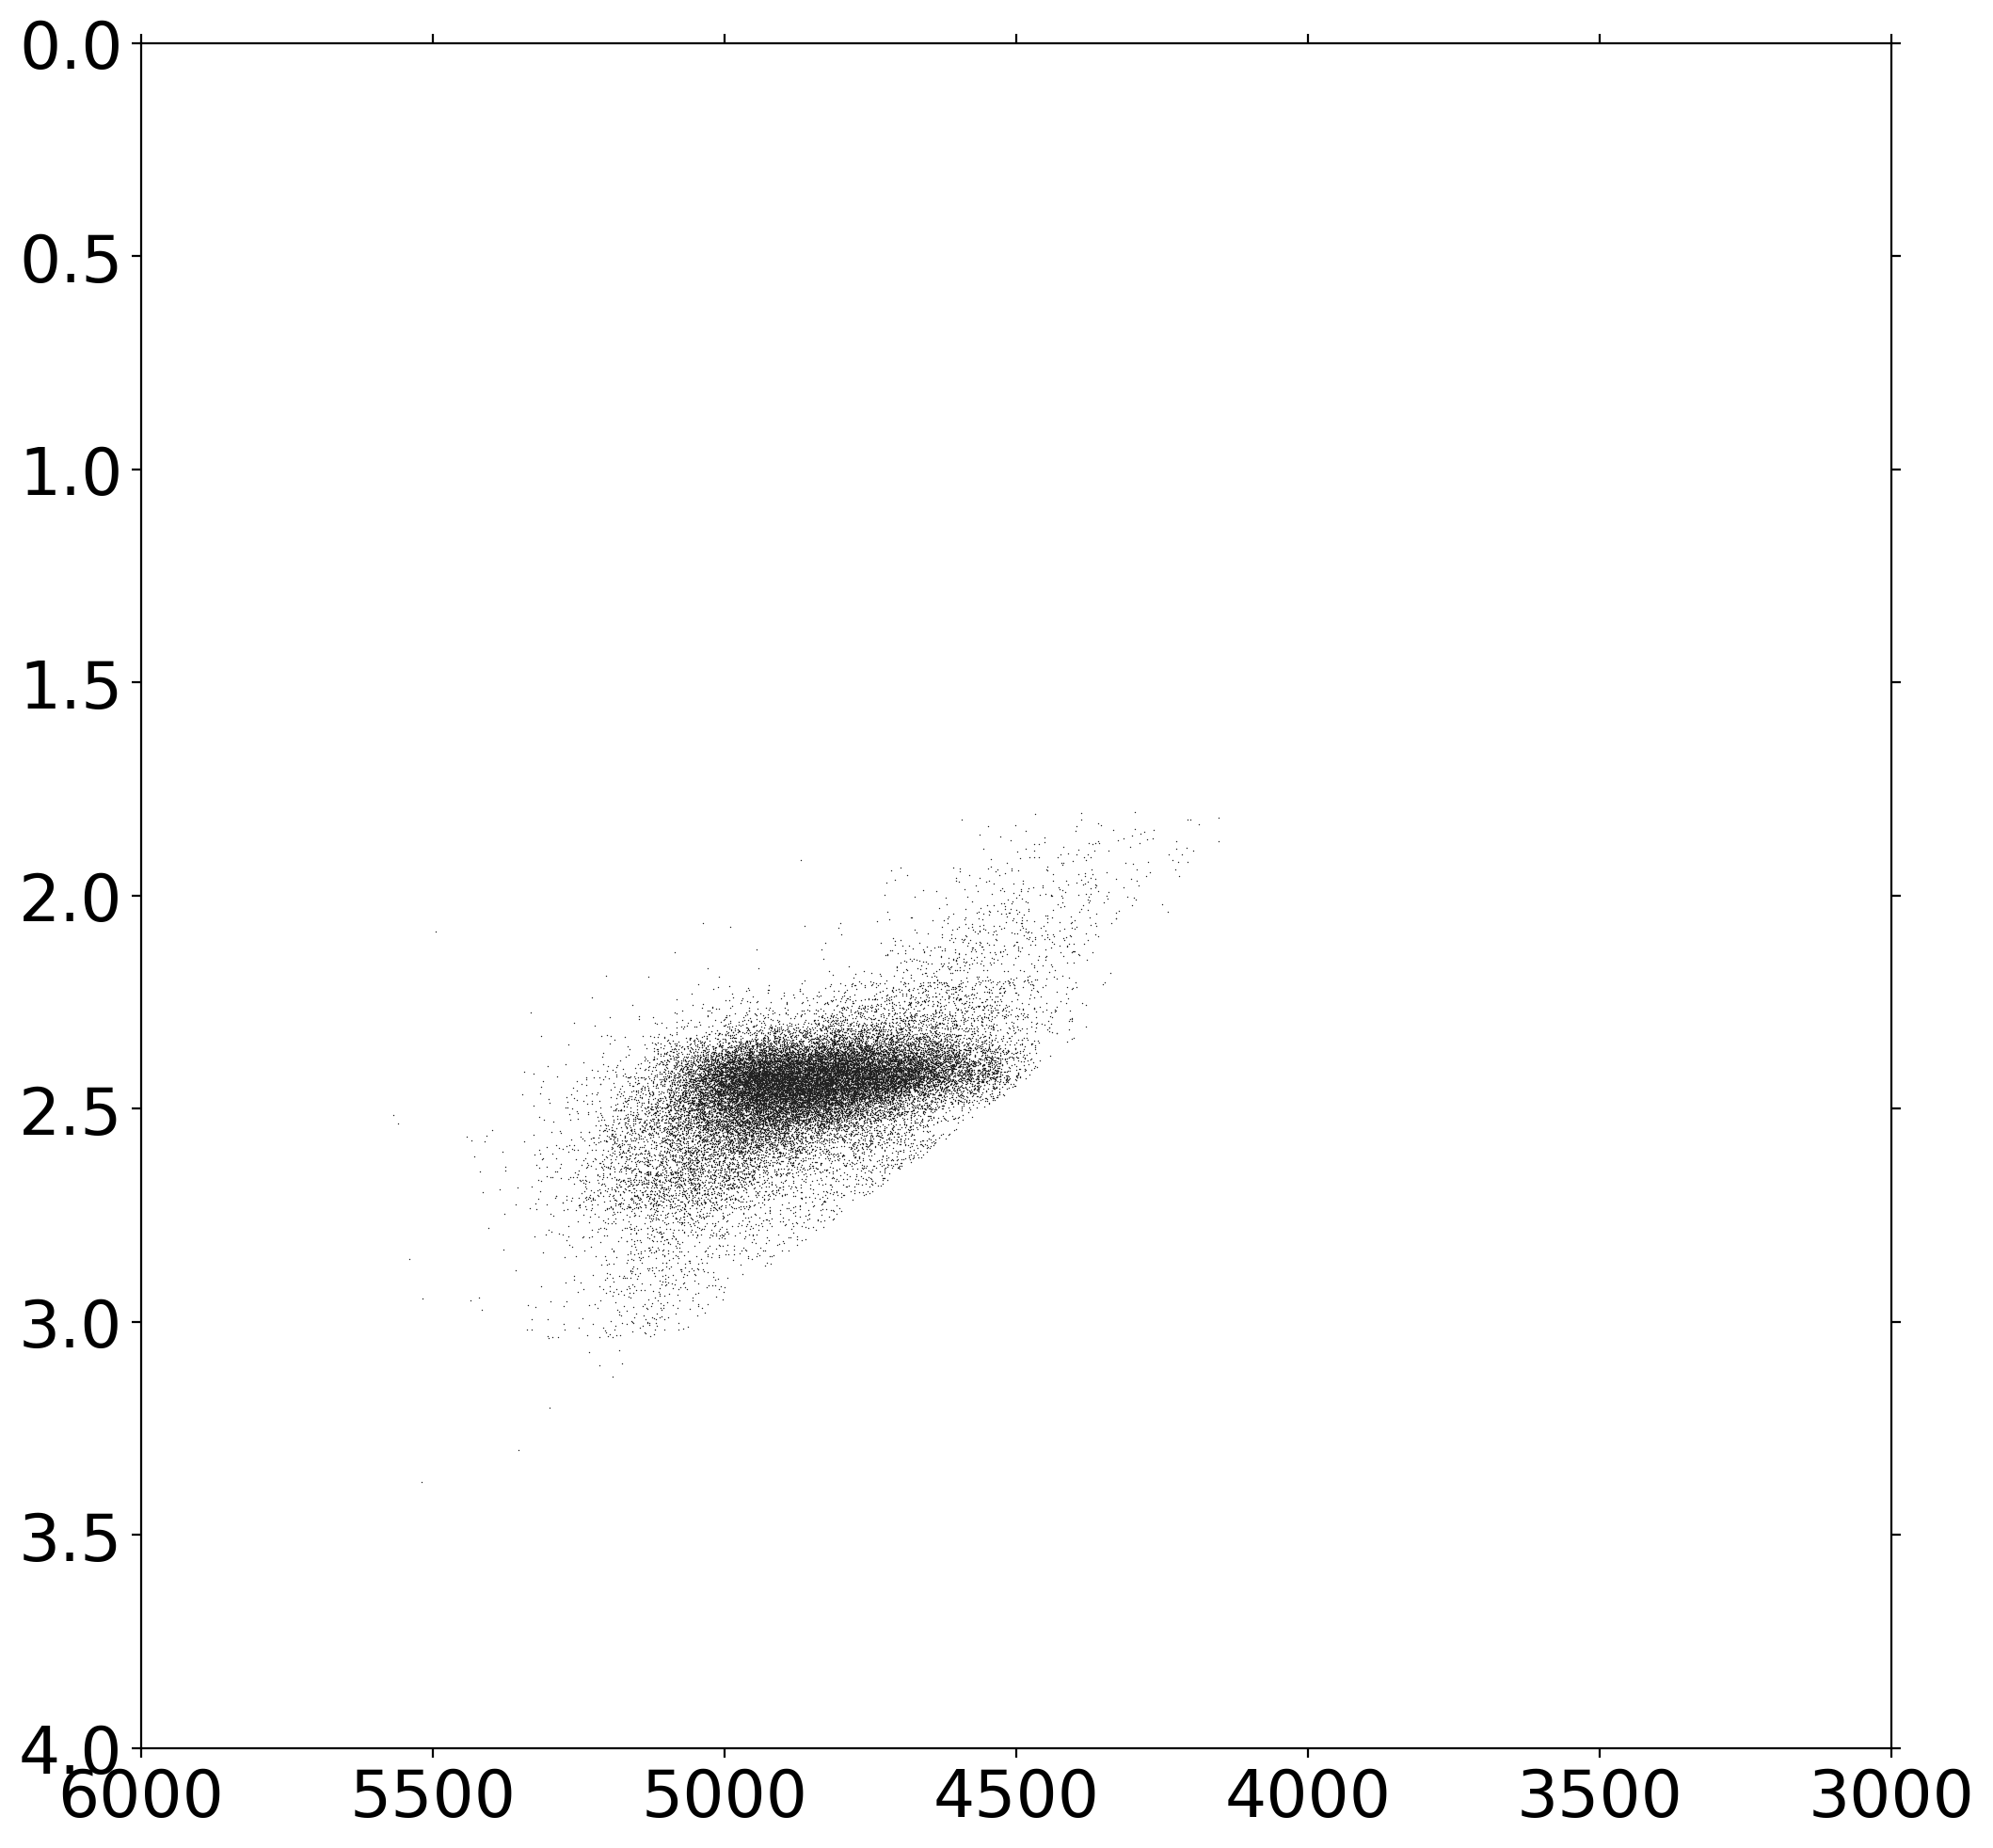

In [65]:
plt.plot(rc["TEFF"], rc["LOGG"], '.', markersize=1)
plt.xlim([6000, 3000])
plt.ylim([4.0, 0.0])

In [ ]:
DR = "14"
l = len(rc)
p = 7514
missing = 0

teff = np.zeros(l)
logg = np.zeros(l)
fe_h = np.zeros(l)
c_h = np.zeros(l)
n_h = np.zeros(l)
o_h = np.zeros(l)
fib = np.zeros(l)
spectra = np.zeros((l, p))
spectra_errs = np.zeros((l, p))
_bitmasks = np.zeros((l, p))

for star in tqdm(range(len(rc)),desc='read star data'):
    LOC = rc[star]['LOCATION_ID']
    APO = rc[star]['APOGEE_ID']
    TEFF = rc[star]['TEFF']
    LOGG = rc[star]['LOGG']
    FE_H = rc[star]['FE_H']
    if DR=='12':
        C_H = rc[star]['C_H']
        N_H = rc[star]['N_H']
        O_H = rc[star]['O_H']
    elif DR=='14':
        C_H = rc[star]['C_FE']
        N_H = rc[star]['N_FE']
        O_H = rc[star]['O_FE']
    FIB = rc[star]['MEANFIB']

    # Fit variables
    teff[star] = np.ma.masked_array(TEFF)
    logg[star] = np.ma.masked_array(LOGG)
    fe_h[star] = np.ma.masked_array(FE_H)
    c_h[star] = np.ma.masked_array(C_H)
    n_h[star] = np.ma.masked_array(N_H)
    o_h[star] = np.ma.masked_array(O_H)
    fib[star] = np.ma.masked_array(FIB)

    # Spectral data
    try:
        spectra[star] = apread.aspcapStar(LOC,APO,ext=1,
                                               header=False,dr=DR,
                                               aspcapWavegrid=True)
        spectra_errs[star] = apread.aspcapStar(LOC,APO,ext=2,
                                                    header=False,
                                                    dr=DR,
                                                    aspcapWavegrid=True)
        _bitmasks[star] = apread.apStar(LOC,APO,ext=3,
                                             header=False,dr=DR, 
                                             aspcapWavegrid=True)[1]
    except IOError:
        print('Star {0} missing '.format(star))
        spectra[star] = np.zeros(p)
        spectra_errs[star] = np.ones(p)
        _bitmasks[star] = np.ones(p).astype(np.int16)
        missing +=1

    if LOGG<-1000 or TEFF<-1000 or FE_H<-1000:
        _bitmasks[star] = np.ones(p).astype(np.int16)





read star data:   0%|          | 0/29502 [00:00<?, ?it/s]



read star data:   0%|          | 2/29502 [00:00<39:25, 12.47it/s]



read star data:   0%|          | 4/29502 [00:00<37:28, 13.12it/s]



read star data:   0%|          | 6/29502 [00:00<35:18, 13.92it/s]



read star data:   0%|          | 8/29502 [00:00<34:02, 14.44it/s]



read star data:   0%|          | 10/29502 [00:00<33:02, 14.87it/s]



read star data:   0%|          | 12/29502 [00:00<32:35, 15.08it/s]



read star data:   0%|          | 14/29502 [00:00<31:37, 15.54it/s]



read star data:   0%|          | 16/29502 [00:01<31:00, 15.85it/s]



read star data:   0%|          | 18/29502 [00:01<30:56, 15.88it/s]



read star data:   0%|          | 20/29502 [00:01<30:41, 16.01it/s]



read star data:   0%|          | 22/29502 [00:01<30:15, 16.23it/s]



read star data:   0%|          | 24/29502 [00:01<30:55, 15.88it/s]



read star data:   0%|          | 26/29502 [00:01<30:50, 15.93it/s]



read star data:   0%|        

read star data:   1%|          | 199/29502 [00:12<30:04, 16.24it/s]



read star data:   1%|          | 201/29502 [00:12<29:43, 16.43it/s]



read star data:   1%|          | 203/29502 [00:12<30:11, 16.17it/s]



read star data:   1%|          | 205/29502 [00:12<29:41, 16.44it/s]



read star data:   1%|          | 207/29502 [00:12<30:50, 15.83it/s]



read star data:   1%|          | 209/29502 [00:12<29:56, 16.31it/s]



read star data:   1%|          | 211/29502 [00:12<29:16, 16.68it/s]



read star data:   1%|          | 213/29502 [00:12<29:51, 16.35it/s]



read star data:   1%|          | 215/29502 [00:13<31:00, 15.74it/s]



read star data:   1%|          | 217/29502 [00:13<30:39, 15.92it/s]



read star data:   1%|          | 219/29502 [00:13<31:02, 15.72it/s]



read star data:   1%|          | 221/29502 [00:13<29:35, 16.49it/s]



read star data:   1%|          | 223/29502 [00:13<28:55, 16.87it/s]



read star data:   1%|          | 225/29502 [00:13<28:44, 16.98it/s]



read s

read star data:   1%|▏         | 396/29502 [00:24<30:42, 15.80it/s]



read star data:   1%|▏         | 398/29502 [00:24<30:31, 15.89it/s]



read star data:   1%|▏         | 400/29502 [00:24<30:11, 16.06it/s]



read star data:   1%|▏         | 402/29502 [00:24<29:20, 16.53it/s]



read star data:   1%|▏         | 404/29502 [00:24<28:52, 16.79it/s]



read star data:   1%|▏         | 406/29502 [00:24<29:07, 16.65it/s]



read star data:   1%|▏         | 408/29502 [00:24<29:34, 16.39it/s]



read star data:   1%|▏         | 410/29502 [00:24<29:44, 16.30it/s]



read star data:   1%|▏         | 412/29502 [00:25<29:31, 16.42it/s]



read star data:   1%|▏         | 414/29502 [00:25<29:46, 16.28it/s]



read star data:   1%|▏         | 416/29502 [00:25<30:03, 16.12it/s]



read star data:   1%|▏         | 418/29502 [00:25<29:40, 16.33it/s]



read star data:   1%|▏         | 420/29502 [00:25<29:16, 16.56it/s]



read star data:   1%|▏         | 422/29502 [00:25<29:30, 16.43it/s]



read s

read star data:   2%|▏         | 592/29502 [00:35<29:16, 16.46it/s]



read star data:   2%|▏         | 594/29502 [00:36<29:06, 16.55it/s]



read star data:   2%|▏         | 596/29502 [00:36<29:18, 16.44it/s]



read star data:   2%|▏         | 598/29502 [00:36<28:42, 16.78it/s]



read star data:   2%|▏         | 600/29502 [00:36<28:43, 16.77it/s]



read star data:   2%|▏         | 602/29502 [00:36<29:17, 16.44it/s]



read star data:   2%|▏         | 604/29502 [00:36<30:32, 15.77it/s]



read star data:   2%|▏         | 606/29502 [00:36<31:37, 15.23it/s]



read star data:   2%|▏         | 608/29502 [00:36<31:04, 15.50it/s]



read star data:   2%|▏         | 610/29502 [00:37<30:17, 15.89it/s]



read star data:   2%|▏         | 612/29502 [00:37<29:55, 16.09it/s]



read star data:   2%|▏         | 614/29502 [00:37<29:58, 16.06it/s]



read star data:   2%|▏         | 616/29502 [00:37<30:43, 15.67it/s]



read star data:   2%|▏         | 618/29502 [00:37<29:46, 16.17it/s]



read s

read star data:   3%|▎         | 788/29502 [00:47<28:34, 16.75it/s]



read star data:   3%|▎         | 790/29502 [00:47<28:44, 16.65it/s]



read star data:   3%|▎         | 792/29502 [00:48<28:33, 16.76it/s]



read star data:   3%|▎         | 794/29502 [00:48<28:48, 16.61it/s]



read star data:   3%|▎         | 796/29502 [00:48<28:35, 16.73it/s]



read star data:   3%|▎         | 798/29502 [00:48<29:31, 16.20it/s]



read star data:   3%|▎         | 800/29502 [00:48<29:25, 16.26it/s]



read star data:   3%|▎         | 802/29502 [00:48<29:34, 16.17it/s]



read star data:   3%|▎         | 804/29502 [00:48<29:04, 16.45it/s]



read star data:   3%|▎         | 806/29502 [00:48<28:57, 16.52it/s]



read star data:   3%|▎         | 808/29502 [00:49<28:20, 16.88it/s]



read star data:   3%|▎         | 810/29502 [00:49<29:08, 16.41it/s]



read star data:   3%|▎         | 812/29502 [00:49<30:09, 15.85it/s]



read star data:   3%|▎         | 814/29502 [00:49<30:01, 15.92it/s]



read s

read star data:   3%|▎         | 984/29502 [00:59<30:03, 15.81it/s]



read star data:   3%|▎         | 986/29502 [00:59<29:20, 16.20it/s]



read star data:   3%|▎         | 988/29502 [01:00<28:56, 16.42it/s]



read star data:   3%|▎         | 990/29502 [01:00<28:43, 16.54it/s]



read star data:   3%|▎         | 992/29502 [01:00<28:39, 16.58it/s]



read star data:   3%|▎         | 994/29502 [01:00<28:38, 16.59it/s]



read star data:   3%|▎         | 996/29502 [01:00<28:57, 16.40it/s]



read star data:   3%|▎         | 998/29502 [01:00<28:52, 16.45it/s]



read star data:   3%|▎         | 1000/29502 [01:00<29:12, 16.26it/s]



read star data:   3%|▎         | 1002/29502 [01:00<28:25, 16.71it/s]



read star data:   3%|▎         | 1004/29502 [01:01<27:54, 17.02it/s]



read star data:   3%|▎         | 1006/29502 [01:01<27:43, 17.13it/s]



read star data:   3%|▎         | 1008/29502 [01:01<28:09, 16.87it/s]



read star data:   3%|▎         | 1010/29502 [01:01<28:02, 16.93it/s]





read star data:   4%|▍         | 1178/29502 [01:11<27:51, 16.95it/s]



read star data:   4%|▍         | 1180/29502 [01:11<28:39, 16.47it/s]



read star data:   4%|▍         | 1182/29502 [01:11<29:15, 16.13it/s]



read star data:   4%|▍         | 1184/29502 [01:12<28:26, 16.59it/s]



read star data:   4%|▍         | 1186/29502 [01:12<27:38, 17.07it/s]



read star data:   4%|▍         | 1188/29502 [01:12<27:34, 17.11it/s]



read star data:   4%|▍         | 1190/29502 [01:12<28:13, 16.71it/s]



read star data:   4%|▍         | 1192/29502 [01:12<28:25, 16.60it/s]



read star data:   4%|▍         | 1194/29502 [01:12<28:07, 16.77it/s]



read star data:   4%|▍         | 1196/29502 [01:12<27:55, 16.90it/s]



read star data:   4%|▍         | 1198/29502 [01:12<27:13, 17.33it/s]



read star data:   4%|▍         | 1200/29502 [01:12<26:46, 17.62it/s]



read star data:   4%|▍         | 1202/29502 [01:13<26:30, 17.80it/s]



read star data:   4%|▍         | 1204/29502 [01:13<26:41, 17.67i

read star data:   5%|▍         | 1372/29502 [01:24<28:21, 16.54it/s]



read star data:   5%|▍         | 1374/29502 [01:24<28:55, 16.21it/s]



read star data:   5%|▍         | 1376/29502 [01:24<30:27, 15.39it/s]



read star data:   5%|▍         | 1378/29502 [01:24<29:18, 15.99it/s]



read star data:   5%|▍         | 1380/29502 [01:25<34:54, 13.43it/s]



read star data:   5%|▍         | 1382/29502 [01:25<32:48, 14.28it/s]



read star data:   5%|▍         | 1384/29502 [01:25<32:31, 14.41it/s]



read star data:   5%|▍         | 1386/29502 [01:25<30:56, 15.14it/s]



read star data:   5%|▍         | 1388/29502 [01:25<29:42, 15.77it/s]



read star data:   5%|▍         | 1390/29502 [01:25<29:43, 15.76it/s]



read star data:   5%|▍         | 1392/29502 [01:25<29:28, 15.90it/s]



read star data:   5%|▍         | 1394/29502 [01:25<28:46, 16.28it/s]



read star data:   5%|▍         | 1396/29502 [01:26<28:30, 16.43it/s]



read star data:   5%|▍         | 1398/29502 [01:26<27:17, 17.17i

read star data:   5%|▌         | 1573/29502 [01:36<26:46, 17.39it/s]



read star data:   5%|▌         | 1575/29502 [01:36<27:00, 17.23it/s]



read star data:   5%|▌         | 1577/29502 [01:36<27:43, 16.79it/s]



read star data:   5%|▌         | 1579/29502 [01:36<27:34, 16.88it/s]



read star data:   5%|▌         | 1581/29502 [01:36<27:22, 17.00it/s]



read star data:   5%|▌         | 1583/29502 [01:36<27:18, 17.04it/s]



read star data:   5%|▌         | 1585/29502 [01:36<27:05, 17.17it/s]



read star data:   5%|▌         | 1587/29502 [01:36<26:59, 17.23it/s]



read star data:   5%|▌         | 1589/29502 [01:37<27:13, 17.09it/s]



read star data:   5%|▌         | 1591/29502 [01:37<27:11, 17.11it/s]



read star data:   5%|▌         | 1593/29502 [01:37<27:49, 16.72it/s]



read star data:   5%|▌         | 1595/29502 [01:37<27:25, 16.96it/s]



read star data:   5%|▌         | 1597/29502 [01:37<28:05, 16.55it/s]



read star data:   5%|▌         | 1599/29502 [01:37<28:20, 16.41i

read star data:   6%|▌         | 1768/29502 [01:47<26:05, 17.72it/s]



read star data:   6%|▌         | 1770/29502 [01:47<25:41, 17.99it/s]



read star data:   6%|▌         | 1772/29502 [01:47<25:38, 18.03it/s]



read star data:   6%|▌         | 1774/29502 [01:47<25:21, 18.23it/s]



read star data:   6%|▌         | 1776/29502 [01:47<26:10, 17.66it/s]



read star data:   6%|▌         | 1778/29502 [01:48<26:48, 17.23it/s]



read star data:   6%|▌         | 1780/29502 [01:48<27:06, 17.04it/s]



read star data:   6%|▌         | 1782/29502 [01:48<26:41, 17.31it/s]



read star data:   6%|▌         | 1784/29502 [01:48<26:40, 17.32it/s]



read star data:   6%|▌         | 1786/29502 [01:48<26:24, 17.49it/s]



read star data:   6%|▌         | 1788/29502 [01:48<26:11, 17.63it/s]



read star data:   6%|▌         | 1790/29502 [01:48<26:34, 17.38it/s]



read star data:   6%|▌         | 1792/29502 [01:48<26:38, 17.34it/s]



read star data:   6%|▌         | 1794/29502 [01:48<27:34, 16.75i

read star data:   7%|▋         | 1963/29502 [01:58<27:40, 16.59it/s]



read star data:   7%|▋         | 1965/29502 [01:58<27:40, 16.59it/s]



read star data:   7%|▋         | 1967/29502 [01:59<29:04, 15.78it/s]



read star data:   7%|▋         | 1969/29502 [01:59<29:16, 15.68it/s]



read star data:   7%|▋         | 1971/29502 [01:59<28:56, 15.85it/s]



read star data:   7%|▋         | 1973/29502 [01:59<28:39, 16.01it/s]



read star data:   7%|▋         | 1975/29502 [01:59<27:56, 16.42it/s]



read star data:   7%|▋         | 1977/29502 [01:59<27:45, 16.53it/s]



read star data:   7%|▋         | 1979/29502 [01:59<27:39, 16.59it/s]



read star data:   7%|▋         | 1981/29502 [01:59<27:08, 16.90it/s]



read star data:   7%|▋         | 1983/29502 [01:59<26:54, 17.04it/s]



read star data:   7%|▋         | 1985/29502 [02:00<26:41, 17.18it/s]



read star data:   7%|▋         | 1987/29502 [02:00<26:30, 17.30it/s]



read star data:   7%|▋         | 1989/29502 [02:00<26:56, 17.02i

read star data:   7%|▋         | 2163/29502 [02:10<27:01, 16.86it/s]



read star data:   7%|▋         | 2165/29502 [02:10<27:05, 16.82it/s]



read star data:   7%|▋         | 2167/29502 [02:10<27:03, 16.83it/s]



read star data:   7%|▋         | 2169/29502 [02:10<26:53, 16.94it/s]



read star data:   7%|▋         | 2171/29502 [02:10<27:08, 16.79it/s]



read star data:   7%|▋         | 2173/29502 [02:10<27:07, 16.79it/s]



read star data:   7%|▋         | 2175/29502 [02:10<27:27, 16.58it/s]



read star data:   7%|▋         | 2177/29502 [02:11<26:51, 16.95it/s]



read star data:   7%|▋         | 2179/29502 [02:11<27:14, 16.71it/s]



read star data:   7%|▋         | 2181/29502 [02:11<26:22, 17.27it/s]



read star data:   7%|▋         | 2184/29502 [02:11<25:31, 17.83it/s]



read star data:   7%|▋         | 2186/29502 [02:11<26:01, 17.49it/s]



read star data:   7%|▋         | 2188/29502 [02:11<26:40, 17.06it/s]



read star data:   7%|▋         | 2190/29502 [02:11<26:19, 17.29i

read star data:   8%|▊         | 2360/29502 [02:21<26:06, 17.33it/s]



read star data:   8%|▊         | 2362/29502 [02:21<26:56, 16.79it/s]



read star data:   8%|▊         | 2364/29502 [02:22<27:38, 16.37it/s]



read star data:   8%|▊         | 2366/29502 [02:22<27:10, 16.65it/s]



read star data:   8%|▊         | 2368/29502 [02:22<26:33, 17.02it/s]



read star data:   8%|▊         | 2370/29502 [02:22<26:20, 17.17it/s]



read star data:   8%|▊         | 2372/29502 [02:22<25:36, 17.66it/s]



read star data:   8%|▊         | 2374/29502 [02:22<25:31, 17.71it/s]



read star data:   8%|▊         | 2376/29502 [02:22<25:53, 17.46it/s]



read star data:   8%|▊         | 2378/29502 [02:22<25:19, 17.85it/s]



read star data:   8%|▊         | 2380/29502 [02:22<25:31, 17.70it/s]



read star data:   8%|▊         | 2382/29502 [02:23<25:51, 17.48it/s]



read star data:   8%|▊         | 2384/29502 [02:23<24:54, 18.15it/s]



read star data:   8%|▊         | 2387/29502 [02:23<23:49, 18.97i

read star data:   9%|▊         | 2559/29502 [02:33<25:20, 17.72it/s]



read star data:   9%|▊         | 2561/29502 [02:33<25:19, 17.73it/s]



read star data:   9%|▊         | 2563/29502 [02:33<25:30, 17.60it/s]



read star data:   9%|▊         | 2565/29502 [02:33<25:48, 17.40it/s]



read star data:   9%|▊         | 2567/29502 [02:33<25:56, 17.31it/s]



read star data:   9%|▊         | 2569/29502 [02:33<26:18, 17.06it/s]



read star data:   9%|▊         | 2571/29502 [02:33<26:40, 16.82it/s]



read star data:   9%|▊         | 2573/29502 [02:33<26:39, 16.84it/s]



read star data:   9%|▊         | 2575/29502 [02:34<26:18, 17.06it/s]



read star data:   9%|▊         | 2577/29502 [02:34<26:10, 17.14it/s]



read star data:   9%|▊         | 2579/29502 [02:34<26:12, 17.12it/s]



read star data:   9%|▊         | 2581/29502 [02:34<26:24, 16.99it/s]



read star data:   9%|▉         | 2583/29502 [02:34<25:19, 17.71it/s]



read star data:   9%|▉         | 2585/29502 [02:34<25:05, 17.88i

read star data:   9%|▉         | 2753/29502 [02:44<25:52, 17.23it/s]



read star data:   9%|▉         | 2755/29502 [02:44<26:15, 16.98it/s]



read star data:   9%|▉         | 2757/29502 [02:44<26:26, 16.86it/s]



read star data:   9%|▉         | 2759/29502 [02:44<26:29, 16.82it/s]



read star data:   9%|▉         | 2761/29502 [02:44<26:02, 17.12it/s]



read star data:   9%|▉         | 2763/29502 [02:45<25:59, 17.14it/s]



read star data:   9%|▉         | 2765/29502 [02:45<26:53, 16.57it/s]



read star data:   9%|▉         | 2767/29502 [02:45<27:00, 16.50it/s]



read star data:   9%|▉         | 2769/29502 [02:45<26:42, 16.68it/s]



read star data:   9%|▉         | 2771/29502 [02:45<26:23, 16.88it/s]



read star data:   9%|▉         | 2773/29502 [02:45<25:12, 17.67it/s]



read star data:   9%|▉         | 2775/29502 [02:45<24:56, 17.86it/s]



read star data:   9%|▉         | 2777/29502 [02:45<25:19, 17.59it/s]



read star data:   9%|▉         | 2779/29502 [02:46<26:11, 17.01i

read star data:  10%|▉         | 2947/29502 [02:55<26:07, 16.94it/s]



read star data:  10%|▉         | 2949/29502 [02:56<25:40, 17.24it/s]



read star data:  10%|█         | 2951/29502 [02:56<25:34, 17.30it/s]



read star data:  10%|█         | 2953/29502 [02:56<26:25, 16.74it/s]



read star data:  10%|█         | 2955/29502 [02:56<26:13, 16.88it/s]



read star data:  10%|█         | 2957/29502 [02:56<25:48, 17.14it/s]



read star data:  10%|█         | 2959/29502 [02:56<25:53, 17.08it/s]



read star data:  10%|█         | 2961/29502 [02:56<26:18, 16.81it/s]



read star data:  10%|█         | 2963/29502 [02:56<26:59, 16.39it/s]



read star data:  10%|█         | 2965/29502 [02:57<26:28, 16.71it/s]



read star data:  10%|█         | 2967/29502 [02:57<26:52, 16.45it/s]



read star data:  10%|█         | 2969/29502 [02:57<26:31, 16.67it/s]



read star data:  10%|█         | 2971/29502 [02:57<26:38, 16.60it/s]



read star data:  10%|█         | 2973/29502 [02:57<25:39, 17.23i

read star data:  11%|█         | 3144/29502 [03:07<23:24, 18.77it/s]



read star data:  11%|█         | 3147/29502 [03:07<22:38, 19.40it/s]



read star data:  11%|█         | 3149/29502 [03:07<22:27, 19.55it/s]



read star data:  11%|█         | 3152/29502 [03:07<21:54, 20.04it/s]



read star data:  11%|█         | 3155/29502 [03:08<21:43, 20.21it/s]



read star data:  11%|█         | 3158/29502 [03:08<22:14, 19.74it/s]



read star data:  11%|█         | 3160/29502 [03:08<22:37, 19.41it/s]



read star data:  11%|█         | 3162/29502 [03:08<22:38, 19.39it/s]



read star data:  11%|█         | 3164/29502 [03:08<22:31, 19.49it/s]



read star data:  11%|█         | 3166/29502 [03:08<22:21, 19.64it/s]



read star data:  11%|█         | 3168/29502 [03:08<22:18, 19.68it/s]



read star data:  11%|█         | 3170/29502 [03:08<22:18, 19.68it/s]



read star data:  11%|█         | 3173/29502 [03:08<22:05, 19.86it/s]



read star data:  11%|█         | 3176/29502 [03:09<21:52, 20.06i

read star data:  11%|█▏        | 3361/29502 [03:20<34:11, 12.74it/s]



read star data:  11%|█▏        | 3363/29502 [03:20<34:12, 12.74it/s]



read star data:  11%|█▏        | 3365/29502 [03:21<34:42, 12.55it/s]



read star data:  11%|█▏        | 3367/29502 [03:21<36:10, 12.04it/s]



read star data:  11%|█▏        | 3369/29502 [03:21<38:14, 11.39it/s]



read star data:  11%|█▏        | 3371/29502 [03:21<36:58, 11.78it/s]



read star data:  11%|█▏        | 3373/29502 [03:21<37:19, 11.67it/s]



read star data:  11%|█▏        | 3375/29502 [03:21<34:41, 12.55it/s]



read star data:  11%|█▏        | 3377/29502 [03:22<34:18, 12.69it/s]



read star data:  11%|█▏        | 3379/29502 [03:22<33:08, 13.14it/s]



read star data:  11%|█▏        | 3381/29502 [03:22<31:27, 13.84it/s]



read star data:  11%|█▏        | 3383/29502 [03:22<29:16, 14.87it/s]



read star data:  11%|█▏        | 3385/29502 [03:22<27:47, 15.67it/s]



read star data:  11%|█▏        | 3388/29502 [03:22<25:52, 16.82i

read star data:  12%|█▏        | 3558/29502 [03:32<24:35, 17.58it/s]



read star data:  12%|█▏        | 3561/29502 [03:32<23:45, 18.20it/s]



read star data:  12%|█▏        | 3563/29502 [03:32<24:38, 17.54it/s]



read star data:  12%|█▏        | 3565/29502 [03:33<24:28, 17.66it/s]



read star data:  12%|█▏        | 3567/29502 [03:33<24:53, 17.36it/s]



read star data:  12%|█▏        | 3569/29502 [03:33<25:08, 17.19it/s]



read star data:  12%|█▏        | 3571/29502 [03:33<25:25, 16.99it/s]



read star data:  12%|█▏        | 3573/29502 [03:33<25:45, 16.78it/s]



read star data:  12%|█▏        | 3575/29502 [03:33<25:11, 17.15it/s]



read star data:  12%|█▏        | 3577/29502 [03:33<25:05, 17.22it/s]



read star data:  12%|█▏        | 3579/29502 [03:33<25:21, 17.03it/s]



read star data:  12%|█▏        | 3581/29502 [03:34<25:26, 16.98it/s]



read star data:  12%|█▏        | 3583/29502 [03:34<25:25, 16.99it/s]



read star data:  12%|█▏        | 3585/29502 [03:34<25:37, 16.86i

read star data:  13%|█▎        | 3754/29502 [03:44<24:43, 17.36it/s]



read star data:  13%|█▎        | 3756/29502 [03:44<24:52, 17.26it/s]



read star data:  13%|█▎        | 3758/29502 [03:44<24:49, 17.29it/s]



read star data:  13%|█▎        | 3760/29502 [03:44<25:00, 17.15it/s]



read star data:  13%|█▎        | 3762/29502 [03:44<25:41, 16.69it/s]



read star data:  13%|█▎        | 3764/29502 [03:44<25:22, 16.90it/s]



read star data:  13%|█▎        | 3766/29502 [03:44<25:14, 17.00it/s]



read star data:  13%|█▎        | 3768/29502 [03:45<25:13, 17.00it/s]



read star data:  13%|█▎        | 3770/29502 [03:45<24:57, 17.19it/s]



read star data:  13%|█▎        | 3772/29502 [03:45<24:28, 17.52it/s]



read star data:  13%|█▎        | 3774/29502 [03:45<24:25, 17.56it/s]



read star data:  13%|█▎        | 3776/29502 [03:45<25:05, 17.09it/s]



read star data:  13%|█▎        | 3778/29502 [03:45<25:35, 16.75it/s]



read star data:  13%|█▎        | 3780/29502 [03:45<25:52, 16.57i

read star data:  13%|█▎        | 3951/29502 [03:55<24:21, 17.49it/s]



read star data:  13%|█▎        | 3953/29502 [03:55<25:00, 17.03it/s]



read star data:  13%|█▎        | 3955/29502 [03:55<24:23, 17.46it/s]



read star data:  13%|█▎        | 3958/29502 [03:56<23:20, 18.24it/s]



read star data:  13%|█▎        | 3960/29502 [03:56<23:15, 18.30it/s]



read star data:  13%|█▎        | 3962/29502 [03:56<23:46, 17.91it/s]



read star data:  13%|█▎        | 3964/29502 [03:56<23:59, 17.74it/s]



read star data:  13%|█▎        | 3966/29502 [03:56<25:17, 16.82it/s]



read star data:  13%|█▎        | 3968/29502 [03:56<24:54, 17.09it/s]



read star data:  13%|█▎        | 3970/29502 [03:56<24:47, 17.16it/s]



read star data:  13%|█▎        | 3972/29502 [03:56<24:34, 17.32it/s]



read star data:  13%|█▎        | 3974/29502 [03:57<26:08, 16.27it/s]



read star data:  13%|█▎        | 3976/29502 [03:57<26:38, 15.97it/s]



read star data:  13%|█▎        | 3978/29502 [03:57<26:24, 16.11i

read star data:  14%|█▍        | 4166/29502 [04:08<26:05, 16.19it/s]



read star data:  14%|█▍        | 4168/29502 [04:08<27:17, 15.47it/s]



read star data:  14%|█▍        | 4170/29502 [04:08<25:55, 16.29it/s]



read star data:  14%|█▍        | 4172/29502 [04:08<26:33, 15.90it/s]



read star data:  14%|█▍        | 4174/29502 [04:08<25:10, 16.77it/s]



read star data:  14%|█▍        | 4176/29502 [04:08<29:13, 14.45it/s]



read star data:  14%|█▍        | 4178/29502 [04:08<27:34, 15.31it/s]



read star data:  14%|█▍        | 4180/29502 [04:09<1:04:41,  6.52it/s]



read star data:  14%|█▍        | 4182/29502 [04:10<1:36:26,  4.38it/s]



read star data:  14%|█▍        | 4183/29502 [04:10<1:22:34,  5.11it/s]



read star data:  14%|█▍        | 4185/29502 [04:10<1:06:41,  6.33it/s]



read star data:  14%|█▍        | 4187/29502 [04:10<54:55,  7.68it/s]  



read star data:  14%|█▍        | 4189/29502 [04:10<46:07,  9.15it/s]



read star data:  14%|█▍        | 4191/29502 [04:11<40:

read star data:  15%|█▍        | 4357/29502 [04:23<27:20, 15.33it/s]



read star data:  15%|█▍        | 4359/29502 [04:23<27:18, 15.34it/s]



read star data:  15%|█▍        | 4361/29502 [04:23<26:55, 15.56it/s]



read star data:  15%|█▍        | 4363/29502 [04:23<26:26, 15.85it/s]



read star data:  15%|█▍        | 4365/29502 [04:23<26:27, 15.84it/s]



read star data:  15%|█▍        | 4367/29502 [04:23<26:26, 15.85it/s]



read star data:  15%|█▍        | 4369/29502 [04:23<26:15, 15.95it/s]



read star data:  15%|█▍        | 4371/29502 [04:24<26:14, 15.96it/s]



read star data:  15%|█▍        | 4373/29502 [04:24<26:25, 15.85it/s]



read star data:  15%|█▍        | 4375/29502 [04:24<26:38, 15.71it/s]



read star data:  15%|█▍        | 4377/29502 [04:24<27:04, 15.47it/s]



read star data:  15%|█▍        | 4379/29502 [04:24<27:22, 15.30it/s]



read star data:  15%|█▍        | 4381/29502 [04:24<26:52, 15.58it/s]



read star data:  15%|█▍        | 4383/29502 [04:24<26:46, 15.64i

read star data:  15%|█▌        | 4551/29502 [04:35<27:04, 15.36it/s]



read star data:  15%|█▌        | 4553/29502 [04:35<25:50, 16.09it/s]



read star data:  15%|█▌        | 4555/29502 [04:35<24:21, 17.07it/s]



read star data:  15%|█▌        | 4557/29502 [04:35<23:17, 17.85it/s]



read star data:  15%|█▌        | 4559/29502 [04:35<26:22, 15.76it/s]



read star data:  15%|█▌        | 4561/29502 [04:36<29:11, 14.24it/s]



read star data:  15%|█▌        | 4563/29502 [04:36<30:08, 13.79it/s]



read star data:  15%|█▌        | 4565/29502 [04:36<29:04, 14.30it/s]



read star data:  15%|█▌        | 4567/29502 [04:36<28:06, 14.79it/s]



read star data:  15%|█▌        | 4569/29502 [04:36<28:21, 14.65it/s]



read star data:  15%|█▌        | 4571/29502 [04:36<28:07, 14.77it/s]



read star data:  16%|█▌        | 4573/29502 [04:36<26:53, 15.45it/s]



read star data:  16%|█▌        | 4575/29502 [04:36<25:53, 16.05it/s]



read star data:  16%|█▌        | 4577/29502 [04:37<25:39, 16.19i

read star data:  16%|█▌        | 4749/29502 [04:47<20:33, 20.07it/s]



read star data:  16%|█▌        | 4752/29502 [04:47<20:22, 20.24it/s]



read star data:  16%|█▌        | 4755/29502 [04:47<20:24, 20.20it/s]



read star data:  16%|█▌        | 4758/29502 [04:47<20:08, 20.48it/s]



read star data:  16%|█▌        | 4761/29502 [04:47<20:32, 20.08it/s]



read star data:  16%|█▌        | 4764/29502 [04:47<20:30, 20.11it/s]



read star data:  16%|█▌        | 4767/29502 [04:47<20:13, 20.38it/s]



read star data:  16%|█▌        | 4770/29502 [04:48<20:07, 20.48it/s]



read star data:  16%|█▌        | 4773/29502 [04:48<20:01, 20.58it/s]



read star data:  16%|█▌        | 4776/29502 [04:48<20:01, 20.59it/s]



read star data:  16%|█▌        | 4779/29502 [04:48<20:11, 20.40it/s]



read star data:  16%|█▌        | 4782/29502 [04:48<20:07, 20.47it/s]



read star data:  16%|█▌        | 4785/29502 [04:48<23:39, 17.41it/s]



read star data:  16%|█▌        | 4787/29502 [04:49<26:04, 15.79i

read star data:  17%|█▋        | 4965/29502 [05:00<25:23, 16.11it/s]



read star data:  17%|█▋        | 4967/29502 [05:01<26:48, 15.26it/s]



read star data:  17%|█▋        | 4969/29502 [05:01<28:15, 14.47it/s]



read star data:  17%|█▋        | 4971/29502 [05:01<28:56, 14.13it/s]



read star data:  17%|█▋        | 4973/29502 [05:01<27:51, 14.68it/s]



read star data:  17%|█▋        | 4975/29502 [05:01<28:40, 14.26it/s]



read star data:  17%|█▋        | 4977/29502 [05:01<27:53, 14.66it/s]



read star data:  17%|█▋        | 4979/29502 [05:01<27:07, 15.06it/s]



read star data:  17%|█▋        | 4981/29502 [05:01<26:34, 15.38it/s]



read star data:  17%|█▋        | 4983/29502 [05:02<28:23, 14.39it/s]



read star data:  17%|█▋        | 4985/29502 [05:02<35:05, 11.64it/s]



read star data:  17%|█▋        | 4987/29502 [05:02<42:18,  9.66it/s]



read star data:  17%|█▋        | 4989/29502 [05:02<43:37,  9.37it/s]



read star data:  17%|█▋        | 4991/29502 [05:03<40:54,  9.99i

read star data:  17%|█▋        | 5159/29502 [05:15<28:13, 14.37it/s]



read star data:  17%|█▋        | 5161/29502 [05:15<27:10, 14.93it/s]



read star data:  18%|█▊        | 5163/29502 [05:15<31:36, 12.83it/s]



read star data:  18%|█▊        | 5165/29502 [05:15<29:42, 13.65it/s]



read star data:  18%|█▊        | 5167/29502 [05:15<31:25, 12.91it/s]



read star data:  18%|█▊        | 5169/29502 [05:15<28:54, 14.03it/s]



read star data:  18%|█▊        | 5171/29502 [05:16<30:00, 13.52it/s]



read star data:  18%|█▊        | 5173/29502 [05:16<28:57, 14.00it/s]



read star data:  18%|█▊        | 5175/29502 [05:16<27:04, 14.97it/s]



read star data:  18%|█▊        | 5177/29502 [05:16<25:59, 15.59it/s]



read star data:  18%|█▊        | 5179/29502 [05:16<25:53, 15.65it/s]



read star data:  18%|█▊        | 5181/29502 [05:16<28:59, 13.98it/s]



read star data:  18%|█▊        | 5183/29502 [05:16<28:54, 14.02it/s]



read star data:  18%|█▊        | 5185/29502 [05:16<28:37, 14.16i

read star data:  18%|█▊        | 5347/29502 [05:30<24:37, 16.34it/s]



read star data:  18%|█▊        | 5349/29502 [05:30<24:04, 16.72it/s]



read star data:  18%|█▊        | 5351/29502 [05:30<23:51, 16.87it/s]



read star data:  18%|█▊        | 5353/29502 [05:30<23:46, 16.92it/s]



read star data:  18%|█▊        | 5355/29502 [05:30<24:01, 16.75it/s]



read star data:  18%|█▊        | 5357/29502 [05:30<24:17, 16.56it/s]



read star data:  18%|█▊        | 5359/29502 [05:30<25:52, 15.55it/s]



read star data:  18%|█▊        | 5361/29502 [05:30<25:39, 15.68it/s]



read star data:  18%|█▊        | 5363/29502 [05:31<26:34, 15.14it/s]



read star data:  18%|█▊        | 5365/29502 [05:31<26:02, 15.45it/s]



read star data:  18%|█▊        | 5367/29502 [05:31<25:08, 16.00it/s]



read star data:  18%|█▊        | 5369/29502 [05:31<24:21, 16.51it/s]



read star data:  18%|█▊        | 5371/29502 [05:31<23:53, 16.83it/s]



read star data:  18%|█▊        | 5373/29502 [05:31<24:24, 16.48i

read star data:  19%|█▉        | 5541/29502 [05:43<24:38, 16.21it/s]



read star data:  19%|█▉        | 5543/29502 [05:43<24:38, 16.21it/s]



read star data:  19%|█▉        | 5545/29502 [05:43<30:45, 12.98it/s]



read star data:  19%|█▉        | 5547/29502 [05:43<31:43, 12.59it/s]



read star data:  19%|█▉        | 5549/29502 [05:43<35:11, 11.35it/s]



read star data:  19%|█▉        | 5551/29502 [05:44<41:17,  9.67it/s]



read star data:  19%|█▉        | 5553/29502 [05:44<45:02,  8.86it/s]



read star data:  19%|█▉        | 5554/29502 [05:44<50:08,  7.96it/s]



read star data:  19%|█▉        | 5556/29502 [05:44<44:30,  8.97it/s]



read star data:  19%|█▉        | 5558/29502 [05:44<38:37, 10.33it/s]



read star data:  19%|█▉        | 5560/29502 [05:45<34:34, 11.54it/s]



read star data:  19%|█▉        | 5562/29502 [05:45<32:02, 12.45it/s]



read star data:  19%|█▉        | 5564/29502 [05:45<29:43, 13.43it/s]



read star data:  19%|█▉        | 5566/29502 [05:45<29:09, 13.68i

read star data:  19%|█▉        | 5734/29502 [05:56<23:15, 17.04it/s]



read star data:  19%|█▉        | 5736/29502 [05:56<23:53, 16.58it/s]



read star data:  19%|█▉        | 5738/29502 [05:56<23:05, 17.16it/s]



read star data:  19%|█▉        | 5740/29502 [05:56<22:32, 17.58it/s]



read star data:  19%|█▉        | 5742/29502 [05:56<22:03, 17.96it/s]



read star data:  19%|█▉        | 5744/29502 [05:56<21:48, 18.15it/s]



read star data:  19%|█▉        | 5746/29502 [05:56<21:24, 18.49it/s]



read star data:  19%|█▉        | 5748/29502 [05:56<21:17, 18.59it/s]



read star data:  19%|█▉        | 5751/29502 [05:57<20:43, 19.11it/s]



read star data:  20%|█▉        | 5753/29502 [05:57<20:26, 19.36it/s]



read star data:  20%|█▉        | 5755/29502 [05:57<20:41, 19.12it/s]



read star data:  20%|█▉        | 5757/29502 [05:57<20:58, 18.87it/s]



read star data:  20%|█▉        | 5759/29502 [05:57<21:07, 18.73it/s]



read star data:  20%|█▉        | 5761/29502 [05:57<24:11, 16.36i

read star data:  20%|██        | 5933/29502 [06:06<21:27, 18.30it/s]



read star data:  20%|██        | 5935/29502 [06:07<22:59, 17.09it/s]



read star data:  20%|██        | 5937/29502 [06:07<25:44, 15.26it/s]



read star data:  20%|██        | 5939/29502 [06:07<24:30, 16.02it/s]



read star data:  20%|██        | 5941/29502 [06:07<23:53, 16.43it/s]



read star data:  20%|██        | 5943/29502 [06:07<23:03, 17.03it/s]



read star data:  20%|██        | 5945/29502 [06:07<22:58, 17.09it/s]



read star data:  20%|██        | 5947/29502 [06:07<25:56, 15.14it/s]



read star data:  20%|██        | 5949/29502 [06:08<34:21, 11.43it/s]



read star data:  20%|██        | 5951/29502 [06:08<32:06, 12.23it/s]



read star data:  20%|██        | 5953/29502 [06:08<30:16, 12.96it/s]



read star data:  20%|██        | 5955/29502 [06:08<30:39, 12.80it/s]



read star data:  20%|██        | 5957/29502 [06:08<28:47, 13.63it/s]



read star data:  20%|██        | 5959/29502 [06:08<27:49, 14.10i

read star data:  21%|██        | 6128/29502 [06:18<20:09, 19.33it/s]



read star data:  21%|██        | 6130/29502 [06:18<20:01, 19.46it/s]



read star data:  21%|██        | 6133/29502 [06:18<19:49, 19.65it/s]



read star data:  21%|██        | 6135/29502 [06:18<19:48, 19.66it/s]



read star data:  21%|██        | 6137/29502 [06:19<21:22, 18.21it/s]



read star data:  21%|██        | 6139/29502 [06:19<21:30, 18.10it/s]



read star data:  21%|██        | 6141/29502 [06:19<22:13, 17.51it/s]



read star data:  21%|██        | 6143/29502 [06:19<21:33, 18.05it/s]



read star data:  21%|██        | 6145/29502 [06:19<21:12, 18.35it/s]



read star data:  21%|██        | 6147/29502 [06:19<20:52, 18.65it/s]



read star data:  21%|██        | 6149/29502 [06:19<20:38, 18.86it/s]



read star data:  21%|██        | 6151/29502 [06:19<20:29, 19.00it/s]



read star data:  21%|██        | 6153/29502 [06:19<20:28, 19.00it/s]



read star data:  21%|██        | 6155/29502 [06:20<20:46, 18.73i

read star data:  21%|██▏       | 6324/29502 [06:29<21:43, 17.78it/s]



read star data:  21%|██▏       | 6326/29502 [06:30<22:20, 17.29it/s]



read star data:  21%|██▏       | 6328/29502 [06:30<22:12, 17.39it/s]



read star data:  21%|██▏       | 6330/29502 [06:30<21:57, 17.58it/s]



read star data:  21%|██▏       | 6332/29502 [06:30<21:30, 17.96it/s]



read star data:  21%|██▏       | 6334/29502 [06:30<21:22, 18.07it/s]



read star data:  21%|██▏       | 6336/29502 [06:30<20:58, 18.41it/s]



read star data:  21%|██▏       | 6338/29502 [06:30<20:33, 18.78it/s]



read star data:  21%|██▏       | 6340/29502 [06:30<21:25, 18.02it/s]



read star data:  21%|██▏       | 6342/29502 [06:30<21:33, 17.90it/s]



read star data:  22%|██▏       | 6344/29502 [06:31<21:17, 18.13it/s]



read star data:  22%|██▏       | 6346/29502 [06:31<21:49, 17.68it/s]



read star data:  22%|██▏       | 6348/29502 [06:31<21:37, 17.84it/s]



read star data:  22%|██▏       | 6350/29502 [06:31<21:53, 17.62i

read star data:  22%|██▏       | 6520/29502 [06:41<25:53, 14.80it/s]



read star data:  22%|██▏       | 6522/29502 [06:41<25:58, 14.74it/s]



read star data:  22%|██▏       | 6524/29502 [06:41<24:56, 15.36it/s]



read star data:  22%|██▏       | 6526/29502 [06:41<25:11, 15.20it/s]



read star data:  22%|██▏       | 6528/29502 [06:41<25:04, 15.27it/s]



read star data:  22%|██▏       | 6530/29502 [06:42<24:40, 15.52it/s]



read star data:  22%|██▏       | 6532/29502 [06:42<23:36, 16.22it/s]



read star data:  22%|██▏       | 6534/29502 [06:42<23:34, 16.24it/s]



read star data:  22%|██▏       | 6536/29502 [06:42<22:55, 16.70it/s]



read star data:  22%|██▏       | 6538/29502 [06:42<23:23, 16.36it/s]



read star data:  22%|██▏       | 6540/29502 [06:42<32:20, 11.83it/s]



read star data:  22%|██▏       | 6542/29502 [06:43<53:31,  7.15it/s]



read star data:  22%|██▏       | 6544/29502 [06:43<51:14,  7.47it/s]



read star data:  22%|██▏       | 6546/29502 [06:43<46:54,  8.16i

read star data:  23%|██▎       | 6711/29502 [06:57<36:49, 10.31it/s]



read star data:  23%|██▎       | 6713/29502 [06:57<33:40, 11.28it/s]



read star data:  23%|██▎       | 6715/29502 [06:57<31:12, 12.17it/s]



read star data:  23%|██▎       | 6717/29502 [06:58<29:37, 12.82it/s]



read star data:  23%|██▎       | 6719/29502 [06:58<29:25, 12.90it/s]



read star data:  23%|██▎       | 6721/29502 [06:58<33:58, 11.18it/s]



read star data:  23%|██▎       | 6723/29502 [06:58<33:17, 11.40it/s]



read star data:  23%|██▎       | 6725/29502 [06:58<34:44, 10.92it/s]



read star data:  23%|██▎       | 6727/29502 [06:58<34:40, 10.95it/s]



read star data:  23%|██▎       | 6729/29502 [06:59<33:15, 11.41it/s]



read star data:  23%|██▎       | 6731/29502 [06:59<31:02, 12.23it/s]



read star data:  23%|██▎       | 6733/29502 [06:59<29:15, 12.97it/s]



read star data:  23%|██▎       | 6735/29502 [06:59<28:16, 13.42it/s]



read star data:  23%|██▎       | 6737/29502 [06:59<28:30, 13.31i

read star data:  23%|██▎       | 6904/29502 [07:11<22:57, 16.40it/s]



read star data:  23%|██▎       | 6906/29502 [07:11<22:49, 16.50it/s]



read star data:  23%|██▎       | 6908/29502 [07:11<22:33, 16.69it/s]



read star data:  23%|██▎       | 6910/29502 [07:11<22:26, 16.78it/s]



read star data:  23%|██▎       | 6912/29502 [07:11<21:41, 17.36it/s]



read star data:  23%|██▎       | 6914/29502 [07:11<21:39, 17.38it/s]



read star data:  23%|██▎       | 6916/29502 [07:11<22:10, 16.97it/s]



read star data:  23%|██▎       | 6918/29502 [07:11<23:15, 16.19it/s]



read star data:  23%|██▎       | 6920/29502 [07:12<23:35, 15.96it/s]



read star data:  23%|██▎       | 6922/29502 [07:12<28:57, 12.99it/s]



read star data:  23%|██▎       | 6924/29502 [07:12<29:23, 12.80it/s]



read star data:  23%|██▎       | 6926/29502 [07:12<30:57, 12.15it/s]



read star data:  23%|██▎       | 6928/29502 [07:12<35:28, 10.61it/s]



read star data:  23%|██▎       | 6930/29502 [07:13<39:56,  9.42i

read star data:  24%|██▍       | 7089/29502 [07:25<22:36, 16.53it/s]



read star data:  24%|██▍       | 7091/29502 [07:25<22:46, 16.40it/s]



read star data:  24%|██▍       | 7093/29502 [07:25<22:46, 16.40it/s]



read star data:  24%|██▍       | 7095/29502 [07:26<23:03, 16.19it/s]



read star data:  24%|██▍       | 7097/29502 [07:26<22:46, 16.40it/s]



read star data:  24%|██▍       | 7099/29502 [07:26<22:39, 16.48it/s]



read star data:  24%|██▍       | 7101/29502 [07:26<22:30, 16.59it/s]



read star data:  24%|██▍       | 7103/29502 [07:26<25:47, 14.47it/s]



read star data:  24%|██▍       | 7105/29502 [07:26<25:18, 14.75it/s]



read star data:  24%|██▍       | 7107/29502 [07:26<24:43, 15.10it/s]



read star data:  24%|██▍       | 7109/29502 [07:26<24:59, 14.94it/s]



read star data:  24%|██▍       | 7111/29502 [07:27<23:43, 15.73it/s]



read star data:  24%|██▍       | 7113/29502 [07:27<24:36, 15.16it/s]



read star data:  24%|██▍       | 7115/29502 [07:27<24:20, 15.33i

read star data:  25%|██▍       | 7283/29502 [07:38<25:05, 14.76it/s]



read star data:  25%|██▍       | 7285/29502 [07:38<24:45, 14.96it/s]



read star data:  25%|██▍       | 7287/29502 [07:39<25:17, 14.64it/s]



read star data:  25%|██▍       | 7289/29502 [07:39<24:22, 15.19it/s]



read star data:  25%|██▍       | 7291/29502 [07:39<24:03, 15.38it/s]



read star data:  25%|██▍       | 7293/29502 [07:39<23:03, 16.05it/s]



read star data:  25%|██▍       | 7295/29502 [07:39<22:54, 16.16it/s]



read star data:  25%|██▍       | 7297/29502 [07:39<22:55, 16.14it/s]



read star data:  25%|██▍       | 7299/29502 [07:39<23:10, 15.96it/s]



read star data:  25%|██▍       | 7301/29502 [07:39<23:01, 16.07it/s]



read star data:  25%|██▍       | 7303/29502 [07:40<22:27, 16.47it/s]



read star data:  25%|██▍       | 7305/29502 [07:40<22:07, 16.73it/s]



read star data:  25%|██▍       | 7307/29502 [07:40<21:52, 16.91it/s]



read star data:  25%|██▍       | 7309/29502 [07:40<22:29, 16.44i

read star data:  25%|██▌       | 7477/29502 [07:51<20:37, 17.80it/s]



read star data:  25%|██▌       | 7479/29502 [07:51<20:31, 17.89it/s]



read star data:  25%|██▌       | 7481/29502 [07:51<21:26, 17.11it/s]



read star data:  25%|██▌       | 7483/29502 [07:51<24:01, 15.28it/s]



read star data:  25%|██▌       | 7485/29502 [07:51<23:48, 15.41it/s]



read star data:  25%|██▌       | 7487/29502 [07:51<23:06, 15.88it/s]



read star data:  25%|██▌       | 7489/29502 [07:52<23:44, 15.46it/s]



read star data:  25%|██▌       | 7491/29502 [07:52<23:22, 15.69it/s]



read star data:  25%|██▌       | 7493/29502 [07:52<23:01, 15.93it/s]



read star data:  25%|██▌       | 7495/29502 [07:52<23:03, 15.91it/s]



read star data:  25%|██▌       | 7497/29502 [07:52<22:17, 16.45it/s]



read star data:  25%|██▌       | 7499/29502 [07:52<22:09, 16.55it/s]



read star data:  25%|██▌       | 7501/29502 [07:52<21:32, 17.02it/s]



read star data:  25%|██▌       | 7503/29502 [07:52<21:07, 17.35i

read star data:  26%|██▌       | 7671/29502 [08:05<23:35, 15.42it/s]



read star data:  26%|██▌       | 7673/29502 [08:05<23:25, 15.53it/s]



read star data:  26%|██▌       | 7675/29502 [08:05<23:14, 15.65it/s]



read star data:  26%|██▌       | 7677/29502 [08:05<23:18, 15.61it/s]



read star data:  26%|██▌       | 7679/29502 [08:05<23:42, 15.34it/s]



read star data:  26%|██▌       | 7681/29502 [08:05<23:42, 15.34it/s]



read star data:  26%|██▌       | 7683/29502 [08:05<23:42, 15.34it/s]



read star data:  26%|██▌       | 7685/29502 [08:06<23:12, 15.67it/s]



read star data:  26%|██▌       | 7687/29502 [08:06<23:35, 15.41it/s]



read star data:  26%|██▌       | 7689/29502 [08:06<23:06, 15.74it/s]



read star data:  26%|██▌       | 7691/29502 [08:06<24:17, 14.96it/s]



read star data:  26%|██▌       | 7693/29502 [08:06<23:14, 15.64it/s]



read star data:  26%|██▌       | 7695/29502 [08:06<22:30, 16.14it/s]



read star data:  26%|██▌       | 7697/29502 [08:06<23:06, 15.72i

read star data:  27%|██▋       | 7865/29502 [08:17<24:24, 14.78it/s]



read star data:  27%|██▋       | 7867/29502 [08:17<23:28, 15.36it/s]



read star data:  27%|██▋       | 7869/29502 [08:17<22:50, 15.79it/s]



read star data:  27%|██▋       | 7871/29502 [08:18<22:40, 15.90it/s]



read star data:  27%|██▋       | 7873/29502 [08:18<22:35, 15.95it/s]



read star data:  27%|██▋       | 7875/29502 [08:18<23:03, 15.63it/s]



read star data:  27%|██▋       | 7877/29502 [08:18<22:29, 16.03it/s]



read star data:  27%|██▋       | 7879/29502 [08:18<22:06, 16.30it/s]



read star data:  27%|██▋       | 7881/29502 [08:18<22:15, 16.19it/s]



read star data:  27%|██▋       | 7883/29502 [08:18<22:56, 15.71it/s]



read star data:  27%|██▋       | 7885/29502 [08:18<22:42, 15.87it/s]



read star data:  27%|██▋       | 7887/29502 [08:19<22:39, 15.89it/s]



read star data:  27%|██▋       | 7889/29502 [08:19<23:22, 15.41it/s]



read star data:  27%|██▋       | 7891/29502 [08:19<23:30, 15.33i

read star data:  27%|██▋       | 8059/29502 [08:28<21:13, 16.84it/s]



read star data:  27%|██▋       | 8061/29502 [08:29<20:49, 17.15it/s]



read star data:  27%|██▋       | 8063/29502 [08:29<20:17, 17.61it/s]



read star data:  27%|██▋       | 8065/29502 [08:29<20:07, 17.75it/s]



read star data:  27%|██▋       | 8067/29502 [08:29<20:20, 17.57it/s]



read star data:  27%|██▋       | 8069/29502 [08:29<20:17, 17.60it/s]



read star data:  27%|██▋       | 8071/29502 [08:29<20:04, 17.79it/s]



read star data:  27%|██▋       | 8073/29502 [08:29<19:35, 18.23it/s]



read star data:  27%|██▋       | 8075/29502 [08:29<19:31, 18.29it/s]



read star data:  27%|██▋       | 8077/29502 [08:29<19:36, 18.21it/s]



read star data:  27%|██▋       | 8079/29502 [08:30<19:41, 18.14it/s]



read star data:  27%|██▋       | 8081/29502 [08:30<19:45, 18.07it/s]



read star data:  27%|██▋       | 8083/29502 [08:30<20:04, 17.78it/s]



read star data:  27%|██▋       | 8085/29502 [08:30<20:08, 17.72i

read star data:  28%|██▊       | 8256/29502 [08:39<19:21, 18.30it/s]



read star data:  28%|██▊       | 8258/29502 [08:40<19:28, 18.19it/s]



read star data:  28%|██▊       | 8260/29502 [08:40<19:24, 18.24it/s]



read star data:  28%|██▊       | 8262/29502 [08:40<19:06, 18.53it/s]



read star data:  28%|██▊       | 8264/29502 [08:40<19:13, 18.41it/s]



read star data:  28%|██▊       | 8266/29502 [08:40<19:16, 18.36it/s]



read star data:  28%|██▊       | 8268/29502 [08:40<19:03, 18.58it/s]



read star data:  28%|██▊       | 8270/29502 [08:40<18:51, 18.76it/s]



read star data:  28%|██▊       | 8272/29502 [08:40<19:34, 18.07it/s]



read star data:  28%|██▊       | 8274/29502 [08:40<19:27, 18.18it/s]



read star data:  28%|██▊       | 8276/29502 [08:41<19:22, 18.26it/s]



read star data:  28%|██▊       | 8278/29502 [08:41<19:19, 18.30it/s]



read star data:  28%|██▊       | 8280/29502 [08:41<19:15, 18.37it/s]



read star data:  28%|██▊       | 8282/29502 [08:41<19:28, 18.16i

read star data:  29%|██▊       | 8452/29502 [08:51<22:17, 15.74it/s]



read star data:  29%|██▊       | 8454/29502 [08:51<21:48, 16.08it/s]



read star data:  29%|██▊       | 8456/29502 [08:51<22:06, 15.87it/s]



read star data:  29%|██▊       | 8458/29502 [08:51<23:48, 14.73it/s]



read star data:  29%|██▊       | 8460/29502 [08:51<23:21, 15.01it/s]



read star data:  29%|██▊       | 8462/29502 [08:51<22:21, 15.68it/s]



read star data:  29%|██▊       | 8464/29502 [08:51<22:25, 15.64it/s]



read star data:  29%|██▊       | 8466/29502 [08:51<21:56, 15.98it/s]



read star data:  29%|██▊       | 8468/29502 [08:52<21:30, 16.30it/s]



read star data:  29%|██▊       | 8470/29502 [08:52<20:49, 16.83it/s]



read star data:  29%|██▊       | 8472/29502 [08:52<20:53, 16.78it/s]



read star data:  29%|██▊       | 8474/29502 [08:52<20:45, 16.88it/s]



read star data:  29%|██▊       | 8476/29502 [08:52<20:47, 16.86it/s]



read star data:  29%|██▊       | 8478/29502 [08:52<21:11, 16.53i

read star data:  29%|██▉       | 8648/29502 [09:02<19:28, 17.84it/s]



read star data:  29%|██▉       | 8650/29502 [09:02<19:22, 17.93it/s]



read star data:  29%|██▉       | 8652/29502 [09:02<19:22, 17.94it/s]



read star data:  29%|██▉       | 8654/29502 [09:03<19:32, 17.78it/s]



read star data:  29%|██▉       | 8656/29502 [09:03<19:23, 17.92it/s]



read star data:  29%|██▉       | 8658/29502 [09:03<19:45, 17.58it/s]



read star data:  29%|██▉       | 8660/29502 [09:03<20:01, 17.34it/s]



read star data:  29%|██▉       | 8662/29502 [09:03<20:25, 17.00it/s]



read star data:  29%|██▉       | 8664/29502 [09:03<19:58, 17.39it/s]



read star data:  29%|██▉       | 8666/29502 [09:03<19:51, 17.48it/s]



read star data:  29%|██▉       | 8668/29502 [09:03<19:49, 17.51it/s]



read star data:  29%|██▉       | 8670/29502 [09:04<19:28, 17.83it/s]



read star data:  29%|██▉       | 8672/29502 [09:04<19:49, 17.51it/s]



read star data:  29%|██▉       | 8674/29502 [09:04<20:05, 17.27i

read star data:  30%|██▉       | 8843/29502 [09:14<18:48, 18.30it/s]



read star data:  30%|██▉       | 8845/29502 [09:14<19:02, 18.08it/s]



read star data:  30%|██▉       | 8847/29502 [09:14<18:36, 18.50it/s]



read star data:  30%|██▉       | 8849/29502 [09:14<18:45, 18.35it/s]



read star data:  30%|███       | 8851/29502 [09:14<19:46, 17.40it/s]



read star data:  30%|███       | 8853/29502 [09:14<21:38, 15.90it/s]



read star data:  30%|███       | 8855/29502 [09:14<22:17, 15.44it/s]



read star data:  30%|███       | 8857/29502 [09:15<22:04, 15.59it/s]



read star data:  30%|███       | 8859/29502 [09:15<21:16, 16.17it/s]



read star data:  30%|███       | 8861/29502 [09:15<20:41, 16.63it/s]



read star data:  30%|███       | 8863/29502 [09:15<20:17, 16.95it/s]



read star data:  30%|███       | 8865/29502 [09:15<19:53, 17.29it/s]



read star data:  30%|███       | 8867/29502 [09:15<20:06, 17.10it/s]



read star data:  30%|███       | 8869/29502 [09:15<20:01, 17.17i

read star data:  31%|███       | 9038/29502 [09:26<19:34, 17.42it/s]



read star data:  31%|███       | 9040/29502 [09:26<19:20, 17.63it/s]



read star data:  31%|███       | 9042/29502 [09:26<19:52, 17.16it/s]



read star data:  31%|███       | 9044/29502 [09:26<19:18, 17.65it/s]



read star data:  31%|███       | 9046/29502 [09:27<21:08, 16.12it/s]



read star data:  31%|███       | 9048/29502 [09:27<21:00, 16.22it/s]



read star data:  31%|███       | 9050/29502 [09:27<20:04, 16.99it/s]



read star data:  31%|███       | 9052/29502 [09:27<20:00, 17.03it/s]



read star data:  31%|███       | 9054/29502 [09:27<20:03, 16.99it/s]



read star data:  31%|███       | 9056/29502 [09:27<20:00, 17.04it/s]



read star data:  31%|███       | 9058/29502 [09:27<19:34, 17.41it/s]



read star data:  31%|███       | 9060/29502 [09:27<19:21, 17.60it/s]



read star data:  31%|███       | 9062/29502 [09:28<19:38, 17.34it/s]



read star data:  31%|███       | 9064/29502 [09:28<19:05, 17.84i

read star data:  31%|███▏      | 9235/29502 [09:38<17:51, 18.91it/s]



read star data:  31%|███▏      | 9237/29502 [09:38<17:53, 18.88it/s]



read star data:  31%|███▏      | 9239/29502 [09:39<20:07, 16.79it/s]



read star data:  31%|███▏      | 9241/29502 [09:39<21:48, 15.49it/s]



read star data:  31%|███▏      | 9243/29502 [09:39<21:50, 15.46it/s]



read star data:  31%|███▏      | 9245/29502 [09:39<21:46, 15.50it/s]



read star data:  31%|███▏      | 9247/29502 [09:39<20:52, 16.18it/s]



read star data:  31%|███▏      | 9249/29502 [09:39<20:29, 16.47it/s]



read star data:  31%|███▏      | 9251/29502 [09:39<19:47, 17.06it/s]



read star data:  31%|███▏      | 9253/29502 [09:39<19:05, 17.68it/s]



read star data:  31%|███▏      | 9255/29502 [09:40<18:55, 17.83it/s]



read star data:  31%|███▏      | 9257/29502 [09:40<19:43, 17.10it/s]



read star data:  31%|███▏      | 9259/29502 [09:40<20:39, 16.33it/s]



read star data:  31%|███▏      | 9261/29502 [09:40<23:55, 14.10i

read star data:  32%|███▏      | 9401/29502 [09:55<52:55,  6.33it/s]



read star data:  32%|███▏      | 9402/29502 [09:55<1:00:28,  5.54it/s]



read star data:  32%|███▏      | 9403/29502 [09:55<59:41,  5.61it/s]  



read star data:  32%|███▏      | 9404/29502 [09:55<1:02:32,  5.36it/s]



read star data:  32%|███▏      | 9406/29502 [09:55<52:00,  6.44it/s]  



read star data:  32%|███▏      | 9407/29502 [09:56<47:50,  7.00it/s]



read star data:  32%|███▏      | 9409/29502 [09:56<39:50,  8.41it/s]



read star data:  32%|███▏      | 9411/29502 [09:56<36:38,  9.14it/s]



read star data:  32%|███▏      | 9413/29502 [09:56<34:11,  9.79it/s]



read star data:  32%|███▏      | 9415/29502 [09:56<31:50, 10.52it/s]



read star data:  32%|███▏      | 9417/29502 [09:56<30:25, 11.00it/s]



read star data:  32%|███▏      | 9419/29502 [09:57<33:21, 10.04it/s]



read star data:  32%|███▏      | 9421/29502 [09:57<32:33, 10.28it/s]



read star data:  32%|███▏      | 9423/29502 [09:57<32:45

read star data:  33%|███▎      | 9591/29502 [10:08<24:10, 13.73it/s]



read star data:  33%|███▎      | 9593/29502 [10:08<23:11, 14.31it/s]



read star data:  33%|███▎      | 9595/29502 [10:08<22:23, 14.82it/s]



read star data:  33%|███▎      | 9597/29502 [10:08<20:39, 16.06it/s]



read star data:  33%|███▎      | 9599/29502 [10:08<20:37, 16.09it/s]



read star data:  33%|███▎      | 9601/29502 [10:09<21:38, 15.32it/s]



read star data:  33%|███▎      | 9603/29502 [10:09<20:46, 15.97it/s]



read star data:  33%|███▎      | 9605/29502 [10:09<20:28, 16.19it/s]



read star data:  33%|███▎      | 9607/29502 [10:09<19:48, 16.74it/s]



read star data:  33%|███▎      | 9609/29502 [10:09<19:27, 17.04it/s]



read star data:  33%|███▎      | 9611/29502 [10:09<18:58, 17.47it/s]



read star data:  33%|███▎      | 9613/29502 [10:09<19:25, 17.07it/s]



read star data:  33%|███▎      | 9615/29502 [10:09<19:18, 17.17it/s]



read star data:  33%|███▎      | 9617/29502 [10:09<20:34, 16.11i

read star data:  33%|███▎      | 9782/29502 [10:21<40:41,  8.08it/s]



read star data:  33%|███▎      | 9784/29502 [10:21<35:53,  9.16it/s]



read star data:  33%|███▎      | 9786/29502 [10:22<31:33, 10.41it/s]



read star data:  33%|███▎      | 9788/29502 [10:22<37:27,  8.77it/s]



read star data:  33%|███▎      | 9790/29502 [10:22<39:26,  8.33it/s]



read star data:  33%|███▎      | 9792/29502 [10:22<36:58,  8.88it/s]



read star data:  33%|███▎      | 9794/29502 [10:22<33:51,  9.70it/s]



read star data:  33%|███▎      | 9796/29502 [10:23<31:05, 10.56it/s]



read star data:  33%|███▎      | 9798/29502 [10:23<28:12, 11.64it/s]



read star data:  33%|███▎      | 9800/29502 [10:23<25:44, 12.76it/s]



read star data:  33%|███▎      | 9802/29502 [10:23<26:16, 12.49it/s]



read star data:  33%|███▎      | 9804/29502 [10:23<28:30, 11.52it/s]



read star data:  33%|███▎      | 9806/29502 [10:23<25:58, 12.64it/s]



read star data:  33%|███▎      | 9808/29502 [10:24<26:35, 12.34i

read star data:  34%|███▍      | 9976/29502 [10:35<18:40, 17.42it/s]



read star data:  34%|███▍      | 9978/29502 [10:35<18:13, 17.86it/s]



read star data:  34%|███▍      | 9980/29502 [10:36<18:39, 17.43it/s]



read star data:  34%|███▍      | 9982/29502 [10:36<18:46, 17.34it/s]



read star data:  34%|███▍      | 9984/29502 [10:36<18:53, 17.22it/s]



read star data:  34%|███▍      | 9986/29502 [10:36<18:57, 17.16it/s]



read star data:  34%|███▍      | 9988/29502 [10:36<19:01, 17.09it/s]



read star data:  34%|███▍      | 9990/29502 [10:36<19:16, 16.87it/s]



read star data:  34%|███▍      | 9992/29502 [10:36<19:02, 17.08it/s]



read star data:  34%|███▍      | 9994/29502 [10:36<18:55, 17.18it/s]



read star data:  34%|███▍      | 9996/29502 [10:37<18:55, 17.18it/s]



read star data:  34%|███▍      | 9998/29502 [10:37<18:48, 17.28it/s]



read star data:  34%|███▍      | 10000/29502 [10:37<18:53, 17.20it/s]



read star data:  34%|███▍      | 10002/29502 [10:37<18:53, 17.2

read star data:  34%|███▍      | 10168/29502 [10:47<19:02, 16.93it/s]



read star data:  34%|███▍      | 10170/29502 [10:47<20:49, 15.47it/s]



read star data:  34%|███▍      | 10172/29502 [10:47<20:56, 15.38it/s]



read star data:  34%|███▍      | 10174/29502 [10:47<21:25, 15.04it/s]



read star data:  34%|███▍      | 10176/29502 [10:47<19:58, 16.13it/s]



read star data:  34%|███▍      | 10178/29502 [10:47<19:20, 16.66it/s]



read star data:  35%|███▍      | 10180/29502 [10:47<18:50, 17.09it/s]



read star data:  35%|███▍      | 10182/29502 [10:47<20:09, 15.98it/s]



read star data:  35%|███▍      | 10184/29502 [10:48<20:25, 15.76it/s]



read star data:  35%|███▍      | 10186/29502 [10:48<22:19, 14.42it/s]



read star data:  35%|███▍      | 10188/29502 [10:48<22:09, 14.52it/s]



read star data:  35%|███▍      | 10190/29502 [10:48<20:59, 15.33it/s]



read star data:  35%|███▍      | 10192/29502 [10:48<20:01, 16.07it/s]



read star data:  35%|███▍      | 10194/29502 [10:48

read star data:  35%|███▌      | 10361/29502 [10:58<17:58, 17.74it/s]



read star data:  35%|███▌      | 10363/29502 [10:58<18:06, 17.62it/s]



read star data:  35%|███▌      | 10365/29502 [10:59<17:53, 17.83it/s]



read star data:  35%|███▌      | 10367/29502 [10:59<17:29, 18.23it/s]



read star data:  35%|███▌      | 10370/29502 [10:59<17:02, 18.71it/s]



read star data:  35%|███▌      | 10372/29502 [10:59<16:44, 19.05it/s]



read star data:  35%|███▌      | 10374/29502 [10:59<16:49, 18.94it/s]



read star data:  35%|███▌      | 10376/29502 [10:59<17:04, 18.67it/s]



read star data:  35%|███▌      | 10378/29502 [10:59<16:54, 18.85it/s]



read star data:  35%|███▌      | 10380/29502 [10:59<16:43, 19.06it/s]



read star data:  35%|███▌      | 10382/29502 [10:59<16:57, 18.79it/s]



read star data:  35%|███▌      | 10384/29502 [11:00<17:10, 18.56it/s]



read star data:  35%|███▌      | 10386/29502 [11:00<17:23, 18.32it/s]



read star data:  35%|███▌      | 10388/29502 [11:00

read star data:  36%|███▌      | 10555/29502 [11:10<20:10, 15.65it/s]



read star data:  36%|███▌      | 10557/29502 [11:10<20:04, 15.73it/s]



read star data:  36%|███▌      | 10559/29502 [11:10<20:04, 15.73it/s]



read star data:  36%|███▌      | 10561/29502 [11:10<19:44, 15.98it/s]



read star data:  36%|███▌      | 10563/29502 [11:10<19:44, 15.99it/s]



read star data:  36%|███▌      | 10565/29502 [11:11<20:02, 15.75it/s]



read star data:  36%|███▌      | 10567/29502 [11:11<20:10, 15.64it/s]



read star data:  36%|███▌      | 10569/29502 [11:11<20:05, 15.70it/s]



read star data:  36%|███▌      | 10571/29502 [11:11<19:59, 15.78it/s]



read star data:  36%|███▌      | 10573/29502 [11:11<19:54, 15.85it/s]



read star data:  36%|███▌      | 10575/29502 [11:11<19:24, 16.25it/s]



read star data:  36%|███▌      | 10577/29502 [11:11<20:35, 15.32it/s]



read star data:  36%|███▌      | 10579/29502 [11:12<20:13, 15.59it/s]



read star data:  36%|███▌      | 10581/29502 [11:12

read star data:  36%|███▋      | 10750/29502 [11:22<16:13, 19.26it/s]



read star data:  36%|███▋      | 10752/29502 [11:22<16:30, 18.92it/s]



read star data:  36%|███▋      | 10754/29502 [11:22<16:50, 18.56it/s]



read star data:  36%|███▋      | 10757/29502 [11:22<16:28, 18.96it/s]



read star data:  36%|███▋      | 10760/29502 [11:22<16:12, 19.28it/s]



read star data:  36%|███▋      | 10762/29502 [11:22<16:09, 19.32it/s]



read star data:  36%|███▋      | 10764/29502 [11:22<16:03, 19.45it/s]



read star data:  36%|███▋      | 10766/29502 [11:22<16:03, 19.45it/s]



read star data:  36%|███▋      | 10768/29502 [11:23<15:58, 19.54it/s]



read star data:  37%|███▋      | 10771/29502 [11:23<15:49, 19.72it/s]



read star data:  37%|███▋      | 10773/29502 [11:23<16:27, 18.97it/s]



read star data:  37%|███▋      | 10775/29502 [11:23<16:15, 19.20it/s]



read star data:  37%|███▋      | 10777/29502 [11:23<16:13, 19.24it/s]



read star data:  37%|███▋      | 10779/29502 [11:23

read star data:  37%|███▋      | 10975/29502 [11:34<19:25, 15.90it/s]



read star data:  37%|███▋      | 10977/29502 [11:34<19:39, 15.70it/s]



read star data:  37%|███▋      | 10979/29502 [11:34<19:12, 16.07it/s]



read star data:  37%|███▋      | 10981/29502 [11:34<19:11, 16.08it/s]



read star data:  37%|███▋      | 10983/29502 [11:34<18:47, 16.42it/s]



read star data:  37%|███▋      | 10985/29502 [11:34<19:00, 16.24it/s]



read star data:  37%|███▋      | 10987/29502 [11:34<18:47, 16.41it/s]



read star data:  37%|███▋      | 10989/29502 [11:35<18:25, 16.75it/s]



read star data:  37%|███▋      | 10991/29502 [11:35<19:01, 16.22it/s]



read star data:  37%|███▋      | 10993/29502 [11:35<18:53, 16.33it/s]



read star data:  37%|███▋      | 10995/29502 [11:35<19:02, 16.20it/s]



read star data:  37%|███▋      | 10997/29502 [11:35<18:47, 16.41it/s]



read star data:  37%|███▋      | 10999/29502 [11:35<18:42, 16.48it/s]



read star data:  37%|███▋      | 11001/29502 [11:35

read star data:  38%|███▊      | 11170/29502 [11:46<18:18, 16.69it/s]



read star data:  38%|███▊      | 11172/29502 [11:46<18:33, 16.46it/s]



read star data:  38%|███▊      | 11174/29502 [11:46<18:59, 16.09it/s]



read star data:  38%|███▊      | 11176/29502 [11:46<18:51, 16.20it/s]



read star data:  38%|███▊      | 11178/29502 [11:46<18:36, 16.41it/s]



read star data:  38%|███▊      | 11180/29502 [11:46<18:03, 16.91it/s]



read star data:  38%|███▊      | 11182/29502 [11:46<17:30, 17.44it/s]



read star data:  38%|███▊      | 11184/29502 [11:46<17:38, 17.30it/s]



read star data:  38%|███▊      | 11186/29502 [11:47<18:27, 16.54it/s]



read star data:  38%|███▊      | 11188/29502 [11:47<18:36, 16.40it/s]



read star data:  38%|███▊      | 11190/29502 [11:47<18:28, 16.51it/s]



read star data:  38%|███▊      | 11192/29502 [11:47<18:35, 16.42it/s]



read star data:  38%|███▊      | 11194/29502 [11:47<18:46, 16.26it/s]



read star data:  38%|███▊      | 11196/29502 [11:47

read star data:  39%|███▊      | 11362/29502 [11:57<18:15, 16.57it/s]



read star data:  39%|███▊      | 11364/29502 [11:58<18:09, 16.66it/s]



read star data:  39%|███▊      | 11366/29502 [11:58<18:11, 16.61it/s]



read star data:  39%|███▊      | 11368/29502 [11:58<18:34, 16.27it/s]



read star data:  39%|███▊      | 11370/29502 [11:58<18:12, 16.60it/s]



read star data:  39%|███▊      | 11372/29502 [11:58<17:36, 17.16it/s]



read star data:  39%|███▊      | 11374/29502 [11:58<17:42, 17.06it/s]



read star data:  39%|███▊      | 11376/29502 [11:58<17:58, 16.81it/s]



read star data:  39%|███▊      | 11378/29502 [11:58<18:07, 16.66it/s]



read star data:  39%|███▊      | 11380/29502 [11:58<19:09, 15.77it/s]



read star data:  39%|███▊      | 11382/29502 [11:59<18:49, 16.05it/s]



read star data:  39%|███▊      | 11384/29502 [11:59<18:46, 16.08it/s]



read star data:  39%|███▊      | 11386/29502 [11:59<18:57, 15.93it/s]



read star data:  39%|███▊      | 11388/29502 [11:59

read star data:  39%|███▉      | 11554/29502 [12:09<18:50, 15.87it/s]



read star data:  39%|███▉      | 11556/29502 [12:09<18:29, 16.17it/s]



read star data:  39%|███▉      | 11558/29502 [12:09<18:52, 15.85it/s]



read star data:  39%|███▉      | 11560/29502 [12:10<18:32, 16.13it/s]



read star data:  39%|███▉      | 11562/29502 [12:10<19:06, 15.64it/s]



read star data:  39%|███▉      | 11564/29502 [12:10<19:30, 15.33it/s]



read star data:  39%|███▉      | 11566/29502 [12:10<19:28, 15.34it/s]



read star data:  39%|███▉      | 11568/29502 [12:10<19:39, 15.21it/s]



read star data:  39%|███▉      | 11570/29502 [12:10<19:18, 15.47it/s]



read star data:  39%|███▉      | 11572/29502 [12:10<18:50, 15.86it/s]



read star data:  39%|███▉      | 11574/29502 [12:10<18:47, 15.89it/s]



read star data:  39%|███▉      | 11576/29502 [12:11<18:39, 16.01it/s]



read star data:  39%|███▉      | 11578/29502 [12:11<18:31, 16.12it/s]



read star data:  39%|███▉      | 11580/29502 [12:11

read star data:  40%|███▉      | 11746/29502 [12:21<18:55, 15.64it/s]



read star data:  40%|███▉      | 11748/29502 [12:21<19:05, 15.49it/s]



read star data:  40%|███▉      | 11750/29502 [12:22<19:07, 15.48it/s]



read star data:  40%|███▉      | 11752/29502 [12:22<19:04, 15.51it/s]



read star data:  40%|███▉      | 11754/29502 [12:22<18:30, 15.99it/s]



read star data:  40%|███▉      | 11756/29502 [12:22<18:37, 15.88it/s]



read star data:  40%|███▉      | 11758/29502 [12:22<18:42, 15.81it/s]



read star data:  40%|███▉      | 11760/29502 [12:22<18:41, 15.82it/s]



read star data:  40%|███▉      | 11762/29502 [12:22<18:34, 15.92it/s]



read star data:  40%|███▉      | 11764/29502 [12:22<18:37, 15.87it/s]



read star data:  40%|███▉      | 11766/29502 [12:23<18:23, 16.07it/s]



read star data:  40%|███▉      | 11768/29502 [12:23<18:18, 16.14it/s]



read star data:  40%|███▉      | 11770/29502 [12:23<18:09, 16.27it/s]



read star data:  40%|███▉      | 11772/29502 [12:23

read star data:  40%|████      | 11938/29502 [12:33<18:07, 16.15it/s]



read star data:  40%|████      | 11940/29502 [12:34<18:24, 15.90it/s]



read star data:  40%|████      | 11942/29502 [12:34<18:13, 16.05it/s]



read star data:  40%|████      | 11944/29502 [12:34<18:26, 15.86it/s]



read star data:  40%|████      | 11946/29502 [12:34<18:20, 15.95it/s]



read star data:  40%|████      | 11948/29502 [12:34<18:25, 15.87it/s]



read star data:  41%|████      | 11950/29502 [12:34<18:28, 15.84it/s]



read star data:  41%|████      | 11952/29502 [12:34<18:39, 15.68it/s]



read star data:  41%|████      | 11954/29502 [12:34<19:33, 14.95it/s]



read star data:  41%|████      | 11956/29502 [12:35<19:22, 15.09it/s]



read star data:  41%|████      | 11958/29502 [12:35<18:36, 15.71it/s]



read star data:  41%|████      | 11960/29502 [12:35<18:52, 15.49it/s]



read star data:  41%|████      | 11962/29502 [12:35<19:11, 15.24it/s]



read star data:  41%|████      | 11964/29502 [12:35

read star data:  41%|████      | 12132/29502 [12:46<17:52, 16.20it/s]



read star data:  41%|████      | 12134/29502 [12:46<17:48, 16.26it/s]



read star data:  41%|████      | 12136/29502 [12:46<17:50, 16.22it/s]



read star data:  41%|████      | 12138/29502 [12:46<17:49, 16.23it/s]



read star data:  41%|████      | 12140/29502 [12:46<17:55, 16.15it/s]



read star data:  41%|████      | 12142/29502 [12:46<18:00, 16.07it/s]



read star data:  41%|████      | 12144/29502 [12:46<18:14, 15.87it/s]



read star data:  41%|████      | 12146/29502 [12:46<18:22, 15.75it/s]



read star data:  41%|████      | 12148/29502 [12:47<18:23, 15.72it/s]



read star data:  41%|████      | 12150/29502 [12:47<18:11, 15.90it/s]



read star data:  41%|████      | 12152/29502 [12:47<18:18, 15.79it/s]



read star data:  41%|████      | 12154/29502 [12:47<18:30, 15.62it/s]



read star data:  41%|████      | 12156/29502 [12:47<18:24, 15.71it/s]



read star data:  41%|████      | 12158/29502 [12:47

read star data:  42%|████▏     | 12324/29502 [12:58<18:11, 15.74it/s]



read star data:  42%|████▏     | 12326/29502 [12:58<18:00, 15.90it/s]



read star data:  42%|████▏     | 12328/29502 [12:58<17:40, 16.20it/s]



read star data:  42%|████▏     | 12330/29502 [12:58<17:26, 16.41it/s]



read star data:  42%|████▏     | 12332/29502 [12:58<17:29, 16.37it/s]



read star data:  42%|████▏     | 12334/29502 [12:58<17:19, 16.52it/s]



read star data:  42%|████▏     | 12336/29502 [12:59<17:29, 16.35it/s]



read star data:  42%|████▏     | 12338/29502 [12:59<17:43, 16.14it/s]



read star data:  42%|████▏     | 12340/29502 [12:59<17:40, 16.18it/s]



read star data:  42%|████▏     | 12342/29502 [12:59<17:30, 16.33it/s]



read star data:  42%|████▏     | 12344/29502 [12:59<17:48, 16.06it/s]



read star data:  42%|████▏     | 12346/29502 [12:59<17:44, 16.11it/s]



read star data:  42%|████▏     | 12348/29502 [12:59<18:21, 15.58it/s]



read star data:  42%|████▏     | 12350/29502 [12:59

read star data:  42%|████▏     | 12516/29502 [13:10<18:06, 15.63it/s]



read star data:  42%|████▏     | 12518/29502 [13:10<18:07, 15.62it/s]



read star data:  42%|████▏     | 12520/29502 [13:10<18:04, 15.66it/s]



read star data:  42%|████▏     | 12522/29502 [13:10<17:41, 15.99it/s]



read star data:  42%|████▏     | 12524/29502 [13:11<17:28, 16.19it/s]



read star data:  42%|████▏     | 12526/29502 [13:11<17:51, 15.85it/s]



read star data:  42%|████▏     | 12528/29502 [13:11<17:39, 16.02it/s]



read star data:  42%|████▏     | 12530/29502 [13:11<17:37, 16.05it/s]



read star data:  42%|████▏     | 12532/29502 [13:11<17:46, 15.92it/s]



read star data:  42%|████▏     | 12534/29502 [13:11<17:59, 15.71it/s]



read star data:  42%|████▏     | 12536/29502 [13:11<18:02, 15.67it/s]



read star data:  42%|████▏     | 12538/29502 [13:11<18:04, 15.64it/s]



read star data:  43%|████▎     | 12540/29502 [13:12<18:11, 15.55it/s]



read star data:  43%|████▎     | 12542/29502 [13:12

read star data:  43%|████▎     | 12708/29502 [13:23<17:46, 15.75it/s]



read star data:  43%|████▎     | 12710/29502 [13:23<17:35, 15.91it/s]



read star data:  43%|████▎     | 12712/29502 [13:23<17:42, 15.80it/s]



read star data:  43%|████▎     | 12714/29502 [13:23<17:33, 15.93it/s]



read star data:  43%|████▎     | 12716/29502 [13:23<17:27, 16.02it/s]



read star data:  43%|████▎     | 12718/29502 [13:23<17:09, 16.31it/s]



read star data:  43%|████▎     | 12720/29502 [13:23<17:10, 16.29it/s]



read star data:  43%|████▎     | 12722/29502 [13:23<17:14, 16.22it/s]



read star data:  43%|████▎     | 12724/29502 [13:24<16:56, 16.50it/s]



read star data:  43%|████▎     | 12726/29502 [13:24<16:46, 16.66it/s]



read star data:  43%|████▎     | 12728/29502 [13:24<16:55, 16.52it/s]



read star data:  43%|████▎     | 12730/29502 [13:24<16:48, 16.63it/s]



read star data:  43%|████▎     | 12732/29502 [13:24<16:36, 16.82it/s]



read star data:  43%|████▎     | 12734/29502 [13:24

read star data:  44%|████▎     | 12900/29502 [13:35<16:35, 16.68it/s]



read star data:  44%|████▎     | 12902/29502 [13:35<16:34, 16.69it/s]



read star data:  44%|████▎     | 12904/29502 [13:35<16:34, 16.69it/s]



read star data:  44%|████▎     | 12906/29502 [13:35<16:41, 16.58it/s]



read star data:  44%|████▍     | 12908/29502 [13:35<16:28, 16.78it/s]



read star data:  44%|████▍     | 12910/29502 [13:35<16:59, 16.27it/s]



read star data:  44%|████▍     | 12912/29502 [13:35<16:53, 16.38it/s]



read star data:  44%|████▍     | 12914/29502 [13:35<16:48, 16.44it/s]



read star data:  44%|████▍     | 12916/29502 [13:36<16:42, 16.55it/s]



read star data:  44%|████▍     | 12918/29502 [13:36<16:04, 17.19it/s]



read star data:  44%|████▍     | 12920/29502 [13:36<16:24, 16.84it/s]



read star data:  44%|████▍     | 12922/29502 [13:36<16:52, 16.38it/s]



read star data:  44%|████▍     | 12924/29502 [13:36<16:42, 16.53it/s]



read star data:  44%|████▍     | 12926/29502 [13:36

read star data:  44%|████▍     | 13093/29502 [13:46<18:30, 14.78it/s]



read star data:  44%|████▍     | 13095/29502 [13:46<17:52, 15.29it/s]



read star data:  44%|████▍     | 13097/29502 [13:46<17:52, 15.30it/s]



read star data:  44%|████▍     | 13099/29502 [13:47<17:44, 15.41it/s]



read star data:  44%|████▍     | 13101/29502 [13:47<17:44, 15.41it/s]



read star data:  44%|████▍     | 13103/29502 [13:47<17:12, 15.89it/s]



read star data:  44%|████▍     | 13105/29502 [13:47<16:42, 16.36it/s]



read star data:  44%|████▍     | 13107/29502 [13:47<16:26, 16.61it/s]



read star data:  44%|████▍     | 13109/29502 [13:47<16:28, 16.59it/s]



read star data:  44%|████▍     | 13111/29502 [13:47<17:43, 15.42it/s]



read star data:  44%|████▍     | 13113/29502 [13:47<17:22, 15.72it/s]



read star data:  44%|████▍     | 13115/29502 [13:48<17:25, 15.67it/s]



read star data:  44%|████▍     | 13117/29502 [13:48<17:17, 15.79it/s]



read star data:  44%|████▍     | 13119/29502 [13:48

read star data:  45%|████▌     | 13285/29502 [13:58<15:30, 17.43it/s]



read star data:  45%|████▌     | 13287/29502 [13:58<16:03, 16.83it/s]



read star data:  45%|████▌     | 13289/29502 [13:58<16:08, 16.74it/s]



read star data:  45%|████▌     | 13291/29502 [13:58<16:00, 16.87it/s]



read star data:  45%|████▌     | 13293/29502 [13:58<15:53, 17.00it/s]



read star data:  45%|████▌     | 13295/29502 [13:58<15:50, 17.05it/s]



read star data:  45%|████▌     | 13297/29502 [13:59<16:01, 16.86it/s]



read star data:  45%|████▌     | 13299/29502 [13:59<16:07, 16.75it/s]



read star data:  45%|████▌     | 13301/29502 [13:59<16:26, 16.43it/s]



read star data:  45%|████▌     | 13303/29502 [13:59<16:28, 16.38it/s]



read star data:  45%|████▌     | 13305/29502 [13:59<16:30, 16.36it/s]



read star data:  45%|████▌     | 13307/29502 [13:59<16:30, 16.36it/s]



read star data:  45%|████▌     | 13309/29502 [13:59<16:10, 16.69it/s]



read star data:  45%|████▌     | 13311/29502 [13:59

read star data:  46%|████▌     | 13477/29502 [14:09<16:02, 16.65it/s]



read star data:  46%|████▌     | 13479/29502 [14:09<15:52, 16.82it/s]



read star data:  46%|████▌     | 13481/29502 [14:09<15:41, 17.02it/s]



read star data:  46%|████▌     | 13483/29502 [14:09<15:48, 16.90it/s]



read star data:  46%|████▌     | 13485/29502 [14:10<15:34, 17.14it/s]



read star data:  46%|████▌     | 13487/29502 [14:10<15:27, 17.27it/s]



read star data:  46%|████▌     | 13489/29502 [14:10<15:22, 17.36it/s]



read star data:  46%|████▌     | 13491/29502 [14:10<15:42, 16.99it/s]



read star data:  46%|████▌     | 13493/29502 [14:10<15:55, 16.75it/s]



read star data:  46%|████▌     | 13495/29502 [14:10<15:48, 16.88it/s]



read star data:  46%|████▌     | 13497/29502 [14:10<15:35, 17.11it/s]



read star data:  46%|████▌     | 13499/29502 [14:10<15:35, 17.11it/s]



read star data:  46%|████▌     | 13501/29502 [14:10<15:24, 17.31it/s]



read star data:  46%|████▌     | 13503/29502 [14:11

read star data:  46%|████▋     | 13669/29502 [14:20<15:51, 16.65it/s]



read star data:  46%|████▋     | 13671/29502 [14:20<15:39, 16.85it/s]



read star data:  46%|████▋     | 13673/29502 [14:21<15:27, 17.07it/s]



read star data:  46%|████▋     | 13675/29502 [14:21<15:31, 16.99it/s]



read star data:  46%|████▋     | 13677/29502 [14:21<15:03, 17.51it/s]



read star data:  46%|████▋     | 13679/29502 [14:21<15:08, 17.41it/s]



read star data:  46%|████▋     | 13681/29502 [14:21<15:25, 17.10it/s]



read star data:  46%|████▋     | 13683/29502 [14:21<15:53, 16.60it/s]



read star data:  46%|████▋     | 13685/29502 [14:21<15:42, 16.79it/s]



read star data:  46%|████▋     | 13687/29502 [14:21<15:36, 16.88it/s]



read star data:  46%|████▋     | 13689/29502 [14:21<15:26, 17.07it/s]



read star data:  46%|████▋     | 13691/29502 [14:22<15:11, 17.34it/s]



read star data:  46%|████▋     | 13693/29502 [14:22<15:12, 17.32it/s]



read star data:  46%|████▋     | 13695/29502 [14:22

read star data:  47%|████▋     | 13861/29502 [14:32<15:48, 16.49it/s]



read star data:  47%|████▋     | 13863/29502 [14:32<15:33, 16.76it/s]



read star data:  47%|████▋     | 13865/29502 [14:32<15:47, 16.49it/s]



read star data:  47%|████▋     | 13867/29502 [14:32<15:32, 16.77it/s]



read star data:  47%|████▋     | 13869/29502 [14:32<15:49, 16.46it/s]



read star data:  47%|████▋     | 13871/29502 [14:32<15:56, 16.34it/s]



read star data:  47%|████▋     | 13873/29502 [14:32<16:05, 16.18it/s]



read star data:  47%|████▋     | 13880/29502 [14:33<12:30, 20.81it/s]



read star data:  47%|████▋     | 13884/29502 [14:33<13:33, 19.21it/s]



read star data:  47%|████▋     | 13887/29502 [14:33<14:00, 18.57it/s]



read star data:  47%|████▋     | 13890/29502 [14:33<14:34, 17.86it/s]



read star data:  47%|████▋     | 13893/29502 [14:33<14:49, 17.56it/s]



read star data:  47%|████▋     | 13895/29502 [14:33<15:04, 17.25it/s]



read star data:  47%|████▋     | 13897/29502 [14:34

read star data:  48%|████▊     | 14066/29502 [14:44<16:40, 15.42it/s]



read star data:  48%|████▊     | 14068/29502 [14:44<15:45, 16.33it/s]



read star data:  48%|████▊     | 14070/29502 [14:44<15:08, 16.98it/s]



read star data:  48%|████▊     | 14073/29502 [14:44<14:33, 17.66it/s]



read star data:  48%|████▊     | 14075/29502 [14:44<15:01, 17.11it/s]



read star data:  48%|████▊     | 14077/29502 [14:44<15:12, 16.91it/s]



read star data:  48%|████▊     | 14079/29502 [14:44<15:21, 16.74it/s]



read star data:  48%|████▊     | 14081/29502 [14:45<15:21, 16.73it/s]



read star data:  48%|████▊     | 14083/29502 [14:45<15:31, 16.55it/s]



read star data:  48%|████▊     | 14085/29502 [14:45<15:20, 16.75it/s]



read star data:  48%|████▊     | 14087/29502 [14:45<15:44, 16.33it/s]



read star data:  48%|████▊     | 14089/29502 [14:45<15:28, 16.59it/s]



read star data:  48%|████▊     | 14091/29502 [14:45<15:38, 16.42it/s]



read star data:  48%|████▊     | 14093/29502 [14:45

read star data:  48%|████▊     | 14263/29502 [14:55<15:11, 16.73it/s]



read star data:  48%|████▊     | 14265/29502 [14:56<15:11, 16.71it/s]



read star data:  48%|████▊     | 14267/29502 [14:56<15:03, 16.87it/s]



read star data:  48%|████▊     | 14269/29502 [14:56<15:04, 16.84it/s]



read star data:  48%|████▊     | 14271/29502 [14:56<14:58, 16.95it/s]



read star data:  48%|████▊     | 14273/29502 [14:56<14:51, 17.08it/s]



read star data:  48%|████▊     | 14275/29502 [14:56<14:40, 17.30it/s]



read star data:  48%|████▊     | 14277/29502 [14:56<14:47, 17.16it/s]



read star data:  48%|████▊     | 14279/29502 [14:56<15:48, 16.05it/s]



read star data:  48%|████▊     | 14281/29502 [14:57<15:26, 16.42it/s]



read star data:  48%|████▊     | 14283/29502 [14:57<16:55, 14.98it/s]



read star data:  48%|████▊     | 14285/29502 [14:57<16:59, 14.92it/s]



read star data:  48%|████▊     | 14287/29502 [14:57<17:02, 14.88it/s]



read star data:  48%|████▊     | 14289/29502 [14:57

read star data:  49%|████▉     | 14455/29502 [15:07<14:32, 17.25it/s]



read star data:  49%|████▉     | 14457/29502 [15:07<14:21, 17.46it/s]



read star data:  49%|████▉     | 14459/29502 [15:07<14:41, 17.06it/s]



read star data:  49%|████▉     | 14461/29502 [15:08<14:50, 16.89it/s]



read star data:  49%|████▉     | 14463/29502 [15:08<14:41, 17.06it/s]



read star data:  49%|████▉     | 14465/29502 [15:08<14:37, 17.14it/s]



read star data:  49%|████▉     | 14467/29502 [15:08<14:33, 17.20it/s]



read star data:  49%|████▉     | 14469/29502 [15:08<14:39, 17.10it/s]



read star data:  49%|████▉     | 14471/29502 [15:08<14:34, 17.19it/s]



read star data:  49%|████▉     | 14473/29502 [15:08<14:20, 17.46it/s]



read star data:  49%|████▉     | 14475/29502 [15:08<14:18, 17.51it/s]



read star data:  49%|████▉     | 14477/29502 [15:08<14:38, 17.09it/s]



read star data:  49%|████▉     | 14479/29502 [15:09<15:06, 16.57it/s]



read star data:  49%|████▉     | 14481/29502 [15:09

read star data:  50%|████▉     | 14647/29502 [15:18<14:49, 16.70it/s]



read star data:  50%|████▉     | 14649/29502 [15:19<14:42, 16.83it/s]



read star data:  50%|████▉     | 14651/29502 [15:19<14:48, 16.72it/s]



read star data:  50%|████▉     | 14653/29502 [15:19<14:29, 17.07it/s]



read star data:  50%|████▉     | 14655/29502 [15:19<14:32, 17.01it/s]



read star data:  50%|████▉     | 14657/29502 [15:19<14:31, 17.03it/s]



read star data:  50%|████▉     | 14659/29502 [15:19<14:29, 17.08it/s]



read star data:  50%|████▉     | 14661/29502 [15:19<14:33, 16.99it/s]



read star data:  50%|████▉     | 14663/29502 [15:19<14:39, 16.87it/s]



read star data:  50%|████▉     | 14665/29502 [15:20<14:43, 16.80it/s]



read star data:  50%|████▉     | 14667/29502 [15:20<14:35, 16.95it/s]



read star data:  50%|████▉     | 14669/29502 [15:20<14:34, 16.95it/s]



read star data:  50%|████▉     | 14671/29502 [15:20<14:29, 17.06it/s]



read star data:  50%|████▉     | 14673/29502 [15:20

read star data:  50%|█████     | 14841/29502 [15:30<14:33, 16.78it/s]



read star data:  50%|█████     | 14843/29502 [15:30<14:37, 16.70it/s]



read star data:  50%|█████     | 14845/29502 [15:30<14:38, 16.68it/s]



read star data:  50%|█████     | 14847/29502 [15:30<14:17, 17.09it/s]



read star data:  50%|█████     | 14849/29502 [15:30<14:26, 16.92it/s]



read star data:  50%|█████     | 14851/29502 [15:30<14:23, 16.97it/s]



read star data:  50%|█████     | 14853/29502 [15:30<14:24, 16.94it/s]



read star data:  50%|█████     | 14855/29502 [15:31<14:18, 17.06it/s]



read star data:  50%|█████     | 14857/29502 [15:31<14:17, 17.07it/s]



read star data:  50%|█████     | 14859/29502 [15:31<14:09, 17.23it/s]



read star data:  50%|█████     | 14861/29502 [15:31<13:54, 17.54it/s]



read star data:  50%|█████     | 14863/29502 [15:31<13:55, 17.52it/s]



read star data:  50%|█████     | 14865/29502 [15:31<13:43, 17.77it/s]



read star data:  50%|█████     | 14867/29502 [15:31

read star data:  51%|█████     | 15032/29502 [15:43<15:25, 15.64it/s]



read star data:  51%|█████     | 15034/29502 [15:43<15:01, 16.04it/s]



read star data:  51%|█████     | 15036/29502 [15:43<14:58, 16.10it/s]



read star data:  51%|█████     | 15038/29502 [15:43<14:30, 16.62it/s]



read star data:  51%|█████     | 15040/29502 [15:43<14:24, 16.73it/s]



read star data:  51%|█████     | 15042/29502 [15:43<14:25, 16.71it/s]



read star data:  51%|█████     | 15044/29502 [15:43<14:07, 17.06it/s]



read star data:  51%|█████     | 15046/29502 [15:43<14:07, 17.05it/s]



read star data:  51%|█████     | 15048/29502 [15:44<14:14, 16.92it/s]



read star data:  51%|█████     | 15050/29502 [15:44<14:07, 17.05it/s]



read star data:  51%|█████     | 15052/29502 [15:44<14:06, 17.07it/s]



read star data:  51%|█████     | 15054/29502 [15:44<14:13, 16.94it/s]



read star data:  51%|█████     | 15056/29502 [15:44<14:16, 16.86it/s]



read star data:  51%|█████     | 15058/29502 [15:44

read star data:  52%|█████▏    | 15225/29502 [15:54<14:27, 16.46it/s]



read star data:  52%|█████▏    | 15227/29502 [15:54<14:34, 16.33it/s]



read star data:  52%|█████▏    | 15229/29502 [15:54<14:39, 16.24it/s]



read star data:  52%|█████▏    | 15231/29502 [15:54<14:28, 16.44it/s]



read star data:  52%|█████▏    | 15233/29502 [15:55<14:13, 16.72it/s]



read star data:  52%|█████▏    | 15235/29502 [15:55<13:54, 17.09it/s]



read star data:  52%|█████▏    | 15237/29502 [15:55<13:47, 17.24it/s]



read star data:  52%|█████▏    | 15239/29502 [15:55<13:49, 17.19it/s]



read star data:  52%|█████▏    | 15241/29502 [15:55<13:55, 17.07it/s]



read star data:  52%|█████▏    | 15243/29502 [15:55<13:44, 17.30it/s]



read star data:  52%|█████▏    | 15245/29502 [15:55<13:50, 17.16it/s]



read star data:  52%|█████▏    | 15247/29502 [15:55<13:53, 17.10it/s]



read star data:  52%|█████▏    | 15249/29502 [15:56<13:56, 17.04it/s]



read star data:  52%|█████▏    | 15251/29502 [15:56

read star data:  52%|█████▏    | 15421/29502 [16:06<14:34, 16.10it/s]



read star data:  52%|█████▏    | 15423/29502 [16:06<14:36, 16.07it/s]



read star data:  52%|█████▏    | 15425/29502 [16:06<14:27, 16.23it/s]



read star data:  52%|█████▏    | 15427/29502 [16:06<14:09, 16.57it/s]



read star data:  52%|█████▏    | 15429/29502 [16:06<13:50, 16.94it/s]



read star data:  52%|█████▏    | 15431/29502 [16:06<14:07, 16.60it/s]



read star data:  52%|█████▏    | 15433/29502 [16:06<14:05, 16.63it/s]



read star data:  52%|█████▏    | 15435/29502 [16:07<13:56, 16.82it/s]



read star data:  52%|█████▏    | 15437/29502 [16:07<14:24, 16.27it/s]



read star data:  52%|█████▏    | 15439/29502 [16:07<14:04, 16.65it/s]



read star data:  52%|█████▏    | 15441/29502 [16:07<14:07, 16.60it/s]



read star data:  52%|█████▏    | 15443/29502 [16:07<13:47, 16.98it/s]



read star data:  52%|█████▏    | 15445/29502 [16:07<13:51, 16.92it/s]



read star data:  52%|█████▏    | 15447/29502 [16:07

read star data:  53%|█████▎    | 15614/29502 [16:17<14:14, 16.25it/s]



read star data:  53%|█████▎    | 15616/29502 [16:17<14:04, 16.45it/s]



read star data:  53%|█████▎    | 15618/29502 [16:18<14:10, 16.32it/s]



read star data:  53%|█████▎    | 15620/29502 [16:18<14:14, 16.24it/s]



read star data:  53%|█████▎    | 15622/29502 [16:18<14:34, 15.87it/s]



read star data:  53%|█████▎    | 15624/29502 [16:18<14:37, 15.82it/s]



read star data:  53%|█████▎    | 15626/29502 [16:18<14:10, 16.31it/s]



read star data:  53%|█████▎    | 15628/29502 [16:18<13:56, 16.58it/s]



read star data:  53%|█████▎    | 15630/29502 [16:18<13:41, 16.88it/s]



read star data:  53%|█████▎    | 15632/29502 [16:18<13:35, 17.00it/s]



read star data:  53%|█████▎    | 15634/29502 [16:18<13:40, 16.89it/s]



read star data:  53%|█████▎    | 15636/29502 [16:19<13:33, 17.05it/s]



read star data:  53%|█████▎    | 15638/29502 [16:19<13:32, 17.07it/s]



read star data:  53%|█████▎    | 15640/29502 [16:19

read star data:  54%|█████▎    | 15810/29502 [16:29<13:39, 16.70it/s]



read star data:  54%|█████▎    | 15812/29502 [16:29<13:38, 16.73it/s]



read star data:  54%|█████▎    | 15814/29502 [16:29<13:51, 16.45it/s]



read star data:  54%|█████▎    | 15816/29502 [16:29<13:30, 16.88it/s]



read star data:  54%|█████▎    | 15818/29502 [16:29<13:35, 16.78it/s]



read star data:  54%|█████▎    | 15820/29502 [16:30<13:43, 16.61it/s]



read star data:  54%|█████▎    | 15822/29502 [16:30<13:57, 16.33it/s]



read star data:  54%|█████▎    | 15824/29502 [16:30<14:05, 16.17it/s]



read star data:  54%|█████▎    | 15826/29502 [16:30<13:49, 16.49it/s]



read star data:  54%|█████▎    | 15828/29502 [16:30<13:49, 16.49it/s]



read star data:  54%|█████▎    | 15830/29502 [16:30<13:44, 16.58it/s]



read star data:  54%|█████▎    | 15832/29502 [16:30<13:24, 16.99it/s]



read star data:  54%|█████▎    | 15834/29502 [16:30<13:37, 16.72it/s]



read star data:  54%|█████▎    | 15836/29502 [16:31

read star data:  54%|█████▍    | 16003/29502 [16:41<14:04, 15.99it/s]



read star data:  54%|█████▍    | 16005/29502 [16:41<13:30, 16.65it/s]



read star data:  54%|█████▍    | 16007/29502 [16:41<13:16, 16.93it/s]



read star data:  54%|█████▍    | 16009/29502 [16:41<13:44, 16.37it/s]



read star data:  54%|█████▍    | 16011/29502 [16:41<13:50, 16.25it/s]



read star data:  54%|█████▍    | 16013/29502 [16:41<13:44, 16.35it/s]



read star data:  54%|█████▍    | 16015/29502 [16:41<13:43, 16.38it/s]



read star data:  54%|█████▍    | 16017/29502 [16:41<13:40, 16.44it/s]



read star data:  54%|█████▍    | 16019/29502 [16:41<13:42, 16.40it/s]



read star data:  54%|█████▍    | 16021/29502 [16:42<13:33, 16.56it/s]



read star data:  54%|█████▍    | 16023/29502 [16:42<13:33, 16.57it/s]



read star data:  54%|█████▍    | 16025/29502 [16:42<13:26, 16.71it/s]



read star data:  54%|█████▍    | 16027/29502 [16:42<13:36, 16.50it/s]



read star data:  54%|█████▍    | 16029/29502 [16:42

read star data:  55%|█████▍    | 16197/29502 [16:52<13:12, 16.79it/s]



read star data:  55%|█████▍    | 16199/29502 [16:52<13:14, 16.75it/s]



read star data:  55%|█████▍    | 16201/29502 [16:52<13:16, 16.70it/s]



read star data:  55%|█████▍    | 16203/29502 [16:52<13:18, 16.65it/s]



read star data:  55%|█████▍    | 16205/29502 [16:53<13:25, 16.51it/s]



read star data:  55%|█████▍    | 16207/29502 [16:53<14:01, 15.81it/s]



read star data:  55%|█████▍    | 16209/29502 [16:53<13:47, 16.06it/s]



read star data:  55%|█████▍    | 16211/29502 [16:53<13:35, 16.29it/s]



read star data:  55%|█████▍    | 16213/29502 [16:53<13:38, 16.25it/s]



read star data:  55%|█████▍    | 16215/29502 [16:53<13:27, 16.46it/s]



read star data:  55%|█████▍    | 16217/29502 [16:53<13:39, 16.21it/s]



read star data:  55%|█████▍    | 16219/29502 [16:53<13:33, 16.33it/s]



read star data:  55%|█████▍    | 16221/29502 [16:53<13:11, 16.78it/s]



read star data:  55%|█████▍    | 16223/29502 [16:54

read star data:  56%|█████▌    | 16389/29502 [17:04<12:52, 16.97it/s]



read star data:  56%|█████▌    | 16391/29502 [17:04<13:05, 16.69it/s]



read star data:  56%|█████▌    | 16393/29502 [17:04<12:51, 16.99it/s]



read star data:  56%|█████▌    | 16395/29502 [17:04<12:49, 17.03it/s]



read star data:  56%|█████▌    | 16397/29502 [17:04<12:42, 17.18it/s]



read star data:  56%|█████▌    | 16399/29502 [17:04<12:29, 17.47it/s]



read star data:  56%|█████▌    | 16401/29502 [17:04<12:26, 17.54it/s]



read star data:  56%|█████▌    | 16403/29502 [17:04<12:43, 17.15it/s]



read star data:  56%|█████▌    | 16405/29502 [17:04<13:01, 16.76it/s]



read star data:  56%|█████▌    | 16407/29502 [17:05<13:17, 16.41it/s]



read star data:  56%|█████▌    | 16409/29502 [17:05<13:11, 16.55it/s]



read star data:  56%|█████▌    | 16411/29502 [17:05<13:06, 16.65it/s]



read star data:  56%|█████▌    | 16413/29502 [17:05<13:09, 16.59it/s]



read star data:  56%|█████▌    | 16415/29502 [17:05

read star data:  56%|█████▌    | 16584/29502 [17:15<10:57, 19.66it/s]



read star data:  56%|█████▌    | 16587/29502 [17:15<10:46, 19.98it/s]



read star data:  56%|█████▌    | 16590/29502 [17:15<10:47, 19.95it/s]



read star data:  56%|█████▌    | 16593/29502 [17:15<10:52, 19.78it/s]



read star data:  56%|█████▋    | 16595/29502 [17:15<10:55, 19.70it/s]



read star data:  56%|█████▋    | 16597/29502 [17:16<11:46, 18.28it/s]



read star data:  56%|█████▋    | 16599/29502 [17:16<11:44, 18.32it/s]



read star data:  56%|█████▋    | 16601/29502 [17:16<12:01, 17.88it/s]



read star data:  56%|█████▋    | 16603/29502 [17:16<11:50, 18.15it/s]



read star data:  56%|█████▋    | 16605/29502 [17:16<12:20, 17.41it/s]



read star data:  56%|█████▋    | 16607/29502 [17:16<12:26, 17.28it/s]



read star data:  56%|█████▋    | 16609/29502 [17:16<12:29, 17.19it/s]



read star data:  56%|█████▋    | 16611/29502 [17:16<12:43, 16.89it/s]



read star data:  56%|█████▋    | 16613/29502 [17:17

read star data:  57%|█████▋    | 16785/29502 [17:26<11:25, 18.55it/s]



read star data:  57%|█████▋    | 16787/29502 [17:27<11:44, 18.05it/s]



read star data:  57%|█████▋    | 16789/29502 [17:27<11:55, 17.76it/s]



read star data:  57%|█████▋    | 16791/29502 [17:27<12:04, 17.54it/s]



read star data:  57%|█████▋    | 16793/29502 [17:27<12:12, 17.36it/s]



read star data:  57%|█████▋    | 16795/29502 [17:27<12:09, 17.43it/s]



read star data:  57%|█████▋    | 16797/29502 [17:27<12:01, 17.62it/s]



read star data:  57%|█████▋    | 16799/29502 [17:27<11:59, 17.66it/s]



read star data:  57%|█████▋    | 16801/29502 [17:27<12:14, 17.28it/s]



read star data:  57%|█████▋    | 16803/29502 [17:27<12:03, 17.55it/s]



read star data:  57%|█████▋    | 16805/29502 [17:28<12:06, 17.48it/s]



read star data:  57%|█████▋    | 16807/29502 [17:28<12:17, 17.22it/s]



read star data:  57%|█████▋    | 16809/29502 [17:28<12:30, 16.91it/s]



read star data:  57%|█████▋    | 16811/29502 [17:28

read star data:  58%|█████▊    | 16977/29502 [17:38<13:15, 15.75it/s]



read star data:  58%|█████▊    | 16979/29502 [17:38<12:42, 16.43it/s]



read star data:  58%|█████▊    | 16981/29502 [17:38<12:36, 16.55it/s]



read star data:  58%|█████▊    | 16983/29502 [17:38<12:38, 16.51it/s]



read star data:  58%|█████▊    | 16985/29502 [17:38<12:32, 16.63it/s]



read star data:  58%|█████▊    | 16987/29502 [17:38<12:42, 16.42it/s]



read star data:  58%|█████▊    | 16989/29502 [17:38<12:39, 16.48it/s]



read star data:  58%|█████▊    | 16991/29502 [17:39<12:25, 16.77it/s]



read star data:  58%|█████▊    | 16993/29502 [17:39<12:23, 16.82it/s]



read star data:  58%|█████▊    | 16995/29502 [17:39<12:39, 16.47it/s]



read star data:  58%|█████▊    | 16997/29502 [17:39<12:24, 16.80it/s]



read star data:  58%|█████▊    | 16999/29502 [17:39<12:26, 16.75it/s]



read star data:  58%|█████▊    | 17001/29502 [17:39<12:28, 16.70it/s]



read star data:  58%|█████▊    | 17003/29502 [17:39

read star data:  58%|█████▊    | 17171/29502 [17:49<12:04, 17.01it/s]



read star data:  58%|█████▊    | 17173/29502 [17:49<12:22, 16.61it/s]



read star data:  58%|█████▊    | 17175/29502 [17:49<12:10, 16.88it/s]



read star data:  58%|█████▊    | 17177/29502 [17:49<12:01, 17.08it/s]



read star data:  58%|█████▊    | 17179/29502 [17:49<11:52, 17.30it/s]



read star data:  58%|█████▊    | 17181/29502 [17:50<12:03, 17.03it/s]



read star data:  58%|█████▊    | 17183/29502 [17:50<12:01, 17.08it/s]



read star data:  58%|█████▊    | 17185/29502 [17:50<12:00, 17.09it/s]



read star data:  58%|█████▊    | 17187/29502 [17:50<12:01, 17.08it/s]



read star data:  58%|█████▊    | 17189/29502 [17:50<12:23, 16.56it/s]



read star data:  58%|█████▊    | 17191/29502 [17:50<12:22, 16.58it/s]



read star data:  58%|█████▊    | 17193/29502 [17:50<12:14, 16.76it/s]



read star data:  58%|█████▊    | 17195/29502 [17:50<12:16, 16.72it/s]



read star data:  58%|█████▊    | 17197/29502 [17:51

read star data:  59%|█████▉    | 17364/29502 [18:01<12:08, 16.65it/s]



read star data:  59%|█████▉    | 17366/29502 [18:01<12:05, 16.74it/s]



read star data:  59%|█████▉    | 17368/29502 [18:01<12:05, 16.73it/s]



read star data:  59%|█████▉    | 17370/29502 [18:01<12:09, 16.63it/s]



read star data:  59%|█████▉    | 17372/29502 [18:01<12:19, 16.40it/s]



read star data:  59%|█████▉    | 17374/29502 [18:01<12:18, 16.43it/s]



read star data:  59%|█████▉    | 17376/29502 [18:01<12:13, 16.52it/s]



read star data:  59%|█████▉    | 17378/29502 [18:01<13:14, 15.26it/s]



read star data:  59%|█████▉    | 17380/29502 [18:02<13:07, 15.39it/s]



read star data:  59%|█████▉    | 17382/29502 [18:02<13:06, 15.40it/s]



read star data:  59%|█████▉    | 17384/29502 [18:02<12:42, 15.90it/s]



read star data:  59%|█████▉    | 17386/29502 [18:02<12:15, 16.48it/s]



read star data:  59%|█████▉    | 17389/29502 [18:02<11:30, 17.55it/s]



read star data:  59%|█████▉    | 17391/29502 [18:02

read star data:  60%|█████▉    | 17559/29502 [18:12<11:58, 16.61it/s]



read star data:  60%|█████▉    | 17561/29502 [18:12<11:48, 16.86it/s]



read star data:  60%|█████▉    | 17563/29502 [18:12<11:50, 16.81it/s]



read star data:  60%|█████▉    | 17565/29502 [18:13<11:48, 16.85it/s]



read star data:  60%|█████▉    | 17567/29502 [18:13<11:46, 16.88it/s]



read star data:  60%|█████▉    | 17569/29502 [18:13<11:56, 16.64it/s]



read star data:  60%|█████▉    | 17571/29502 [18:13<11:51, 16.78it/s]



read star data:  60%|█████▉    | 17573/29502 [18:13<11:29, 17.29it/s]



read star data:  60%|█████▉    | 17575/29502 [18:13<11:43, 16.95it/s]



read star data:  60%|█████▉    | 17577/29502 [18:13<11:40, 17.03it/s]



read star data:  60%|█████▉    | 17579/29502 [18:13<11:50, 16.79it/s]



read star data:  60%|█████▉    | 17581/29502 [18:14<11:51, 16.76it/s]



read star data:  60%|█████▉    | 17583/29502 [18:14<11:38, 17.07it/s]



read star data:  60%|█████▉    | 17585/29502 [18:14

read star data:  60%|██████    | 17751/29502 [18:23<11:09, 17.55it/s]



read star data:  60%|██████    | 17753/29502 [18:24<11:08, 17.59it/s]



read star data:  60%|██████    | 17755/29502 [18:24<11:09, 17.55it/s]



read star data:  60%|██████    | 17757/29502 [18:24<11:13, 17.43it/s]



read star data:  60%|██████    | 17759/29502 [18:24<11:26, 17.10it/s]



read star data:  60%|██████    | 17761/29502 [18:24<11:21, 17.23it/s]



read star data:  60%|██████    | 17763/29502 [18:24<11:25, 17.13it/s]



read star data:  60%|██████    | 17765/29502 [18:24<11:37, 16.82it/s]



read star data:  60%|██████    | 17767/29502 [18:24<11:42, 16.69it/s]



read star data:  60%|██████    | 17769/29502 [18:24<11:35, 16.86it/s]



read star data:  60%|██████    | 17771/29502 [18:25<11:41, 16.73it/s]



read star data:  60%|██████    | 17773/29502 [18:25<11:24, 17.14it/s]



read star data:  60%|██████    | 17775/29502 [18:25<11:27, 17.07it/s]



read star data:  60%|██████    | 17777/29502 [18:25

read star data:  61%|██████    | 17943/29502 [18:35<11:38, 16.56it/s]



read star data:  61%|██████    | 17945/29502 [18:35<11:45, 16.38it/s]



read star data:  61%|██████    | 17947/29502 [18:35<11:41, 16.48it/s]



read star data:  61%|██████    | 17949/29502 [18:35<11:32, 16.69it/s]



read star data:  61%|██████    | 17951/29502 [18:36<11:27, 16.80it/s]



read star data:  61%|██████    | 17953/29502 [18:36<11:18, 17.02it/s]



read star data:  61%|██████    | 17955/29502 [18:36<11:05, 17.35it/s]



read star data:  61%|██████    | 17957/29502 [18:36<11:12, 17.17it/s]



read star data:  61%|██████    | 17959/29502 [18:36<11:06, 17.32it/s]



read star data:  61%|██████    | 17961/29502 [18:36<11:01, 17.45it/s]



read star data:  61%|██████    | 17963/29502 [18:36<11:10, 17.22it/s]



read star data:  61%|██████    | 17965/29502 [18:36<11:13, 17.13it/s]



read star data:  61%|██████    | 17967/29502 [18:36<11:02, 17.40it/s]



read star data:  61%|██████    | 17969/29502 [18:37

read star data:  61%|██████▏   | 18140/29502 [18:47<11:33, 16.38it/s]



read star data:  61%|██████▏   | 18142/29502 [18:47<11:46, 16.08it/s]



read star data:  62%|██████▏   | 18144/29502 [18:47<11:44, 16.12it/s]



read star data:  62%|██████▏   | 18146/29502 [18:47<11:55, 15.88it/s]



read star data:  62%|██████▏   | 18148/29502 [18:47<12:03, 15.69it/s]



read star data:  62%|██████▏   | 18150/29502 [18:47<11:55, 15.87it/s]



read star data:  62%|██████▏   | 18153/29502 [18:48<11:11, 16.89it/s]



read star data:  62%|██████▏   | 18155/29502 [18:48<11:28, 16.49it/s]



read star data:  62%|██████▏   | 18157/29502 [18:48<11:21, 16.64it/s]



read star data:  62%|██████▏   | 18159/29502 [18:48<11:20, 16.66it/s]



read star data:  62%|██████▏   | 18161/29502 [18:48<11:36, 16.29it/s]



read star data:  62%|██████▏   | 18163/29502 [18:48<11:38, 16.24it/s]



read star data:  62%|██████▏   | 18165/29502 [18:48<11:35, 16.31it/s]



read star data:  62%|██████▏   | 18167/29502 [18:48

read star data:  62%|██████▏   | 18333/29502 [18:58<10:53, 17.08it/s]



read star data:  62%|██████▏   | 18335/29502 [18:59<11:10, 16.66it/s]



read star data:  62%|██████▏   | 18337/29502 [18:59<11:18, 16.46it/s]



read star data:  62%|██████▏   | 18339/29502 [18:59<11:23, 16.33it/s]



read star data:  62%|██████▏   | 18341/29502 [18:59<11:36, 16.03it/s]



read star data:  62%|██████▏   | 18343/29502 [18:59<11:40, 15.92it/s]



read star data:  62%|██████▏   | 18345/29502 [18:59<11:43, 15.86it/s]



read star data:  62%|██████▏   | 18347/29502 [18:59<11:43, 15.86it/s]



read star data:  62%|██████▏   | 18349/29502 [18:59<11:38, 15.97it/s]



read star data:  62%|██████▏   | 18351/29502 [19:00<11:35, 16.02it/s]



read star data:  62%|██████▏   | 18353/29502 [19:00<11:20, 16.39it/s]



read star data:  62%|██████▏   | 18355/29502 [19:00<11:17, 16.45it/s]



read star data:  62%|██████▏   | 18357/29502 [19:00<11:22, 16.34it/s]



read star data:  62%|██████▏   | 18359/29502 [19:00

read star data:  63%|██████▎   | 18526/29502 [19:10<10:38, 17.18it/s]



read star data:  63%|██████▎   | 18528/29502 [19:10<10:37, 17.22it/s]



read star data:  63%|██████▎   | 18530/29502 [19:10<11:02, 16.57it/s]



read star data:  63%|██████▎   | 18532/29502 [19:11<11:04, 16.51it/s]



read star data:  63%|██████▎   | 18534/29502 [19:11<11:07, 16.43it/s]



read star data:  63%|██████▎   | 18536/29502 [19:11<11:06, 16.46it/s]



read star data:  63%|██████▎   | 18538/29502 [19:11<10:42, 17.06it/s]



read star data:  63%|██████▎   | 18540/29502 [19:11<10:26, 17.50it/s]



read star data:  63%|██████▎   | 18542/29502 [19:11<10:32, 17.32it/s]



read star data:  63%|██████▎   | 18544/29502 [19:11<10:42, 17.06it/s]



read star data:  63%|██████▎   | 18546/29502 [19:11<10:35, 17.25it/s]



read star data:  63%|██████▎   | 18548/29502 [19:12<12:35, 14.50it/s]



read star data:  63%|██████▎   | 18550/29502 [19:12<12:28, 14.63it/s]



read star data:  63%|██████▎   | 18552/29502 [19:12

read star data:  63%|██████▎   | 18718/29502 [19:22<11:20, 15.86it/s]



read star data:  63%|██████▎   | 18720/29502 [19:22<11:16, 15.93it/s]



read star data:  63%|██████▎   | 18722/29502 [19:22<11:35, 15.49it/s]



read star data:  63%|██████▎   | 18724/29502 [19:23<11:20, 15.84it/s]



read star data:  63%|██████▎   | 18726/29502 [19:23<10:54, 16.48it/s]



read star data:  63%|██████▎   | 18728/29502 [19:23<10:57, 16.39it/s]



read star data:  63%|██████▎   | 18730/29502 [19:23<11:00, 16.32it/s]



read star data:  63%|██████▎   | 18732/29502 [19:23<11:03, 16.23it/s]



read star data:  64%|██████▎   | 18734/29502 [19:23<10:58, 16.34it/s]



read star data:  64%|██████▎   | 18736/29502 [19:23<10:52, 16.50it/s]



read star data:  64%|██████▎   | 18738/29502 [19:23<10:59, 16.32it/s]



read star data:  64%|██████▎   | 18740/29502 [19:23<10:55, 16.43it/s]



read star data:  64%|██████▎   | 18742/29502 [19:24<11:13, 15.97it/s]



read star data:  64%|██████▎   | 18744/29502 [19:24

read star data:  64%|██████▍   | 18910/29502 [19:34<10:41, 16.52it/s]



read star data:  64%|██████▍   | 18912/29502 [19:34<10:50, 16.29it/s]



read star data:  64%|██████▍   | 18914/29502 [19:34<11:18, 15.61it/s]



read star data:  64%|██████▍   | 18916/29502 [19:34<11:10, 15.80it/s]



read star data:  64%|██████▍   | 18918/29502 [19:34<11:04, 15.93it/s]



read star data:  64%|██████▍   | 18920/29502 [19:35<11:06, 15.89it/s]



read star data:  64%|██████▍   | 18922/29502 [19:35<11:00, 16.02it/s]



read star data:  64%|██████▍   | 18924/29502 [19:35<10:52, 16.22it/s]



read star data:  64%|██████▍   | 18926/29502 [19:35<10:47, 16.32it/s]



read star data:  64%|██████▍   | 18928/29502 [19:35<10:42, 16.45it/s]



read star data:  64%|██████▍   | 18930/29502 [19:35<10:44, 16.40it/s]



read star data:  64%|██████▍   | 18932/29502 [19:35<10:45, 16.38it/s]



read star data:  64%|██████▍   | 18934/29502 [19:35<11:14, 15.67it/s]



read star data:  64%|██████▍   | 18936/29502 [19:36

read star data:  65%|██████▍   | 19102/29502 [19:46<10:50, 15.98it/s]



read star data:  65%|██████▍   | 19104/29502 [19:46<10:45, 16.12it/s]



read star data:  65%|██████▍   | 19106/29502 [19:46<10:22, 16.70it/s]



read star data:  65%|██████▍   | 19108/29502 [19:46<10:13, 16.95it/s]



read star data:  65%|██████▍   | 19110/29502 [19:46<10:20, 16.76it/s]



read star data:  65%|██████▍   | 19112/29502 [19:46<10:26, 16.60it/s]



read star data:  65%|██████▍   | 19114/29502 [19:46<10:20, 16.73it/s]



read star data:  65%|██████▍   | 19116/29502 [19:47<10:20, 16.73it/s]



read star data:  65%|██████▍   | 19118/29502 [19:47<10:24, 16.62it/s]



read star data:  65%|██████▍   | 19120/29502 [19:47<10:26, 16.56it/s]



read star data:  65%|██████▍   | 19122/29502 [19:47<10:23, 16.65it/s]



read star data:  65%|██████▍   | 19124/29502 [19:47<10:35, 16.34it/s]



read star data:  65%|██████▍   | 19126/29502 [19:47<10:57, 15.77it/s]



read star data:  65%|██████▍   | 19128/29502 [19:47

read star data:  65%|██████▌   | 19294/29502 [19:58<10:40, 15.93it/s]



read star data:  65%|██████▌   | 19296/29502 [19:58<10:43, 15.86it/s]



read star data:  65%|██████▌   | 19298/29502 [19:58<10:26, 16.29it/s]



read star data:  65%|██████▌   | 19300/29502 [19:58<10:22, 16.39it/s]



read star data:  65%|██████▌   | 19302/29502 [19:58<10:37, 16.01it/s]



read star data:  65%|██████▌   | 19304/29502 [19:58<10:21, 16.41it/s]



read star data:  65%|██████▌   | 19306/29502 [19:58<10:14, 16.60it/s]



read star data:  65%|██████▌   | 19308/29502 [19:58<10:17, 16.51it/s]



read star data:  65%|██████▌   | 19310/29502 [19:59<10:18, 16.48it/s]



read star data:  65%|██████▌   | 19312/29502 [19:59<10:18, 16.48it/s]



read star data:  65%|██████▌   | 19314/29502 [19:59<10:16, 16.52it/s]



read star data:  65%|██████▌   | 19316/29502 [19:59<10:16, 16.53it/s]



read star data:  65%|██████▌   | 19318/29502 [19:59<10:28, 16.22it/s]



read star data:  65%|██████▌   | 19320/29502 [19:59

read star data:  66%|██████▌   | 19488/29502 [20:09<09:53, 16.86it/s]



read star data:  66%|██████▌   | 19490/29502 [20:09<09:50, 16.94it/s]



read star data:  66%|██████▌   | 19492/29502 [20:09<10:00, 16.68it/s]



read star data:  66%|██████▌   | 19494/29502 [20:09<09:54, 16.85it/s]



read star data:  66%|██████▌   | 19496/29502 [20:10<09:44, 17.12it/s]



read star data:  66%|██████▌   | 19498/29502 [20:10<09:46, 17.07it/s]



read star data:  66%|██████▌   | 19500/29502 [20:10<09:38, 17.30it/s]



read star data:  66%|██████▌   | 19502/29502 [20:10<09:20, 17.85it/s]



read star data:  66%|██████▌   | 19504/29502 [20:10<09:35, 17.38it/s]



read star data:  66%|██████▌   | 19506/29502 [20:10<09:52, 16.88it/s]



read star data:  66%|██████▌   | 19508/29502 [20:10<10:01, 16.62it/s]



read star data:  66%|██████▌   | 19510/29502 [20:10<10:12, 16.32it/s]



read star data:  66%|██████▌   | 19512/29502 [20:10<10:16, 16.20it/s]



read star data:  66%|██████▌   | 19514/29502 [20:11

read star data:  67%|██████▋   | 19680/29502 [20:21<10:11, 16.05it/s]



read star data:  67%|██████▋   | 19682/29502 [20:21<10:09, 16.11it/s]



read star data:  67%|██████▋   | 19684/29502 [20:21<10:18, 15.88it/s]



read star data:  67%|██████▋   | 19686/29502 [20:21<10:18, 15.86it/s]



read star data:  67%|██████▋   | 19688/29502 [20:21<10:14, 15.96it/s]



read star data:  67%|██████▋   | 19690/29502 [20:22<10:16, 15.91it/s]



read star data:  67%|██████▋   | 19692/29502 [20:22<10:03, 16.24it/s]



read star data:  67%|██████▋   | 19694/29502 [20:22<10:06, 16.16it/s]



read star data:  67%|██████▋   | 19696/29502 [20:22<11:02, 14.80it/s]



read star data:  67%|██████▋   | 19698/29502 [20:22<10:37, 15.39it/s]



read star data:  67%|██████▋   | 19700/29502 [20:22<10:24, 15.69it/s]



read star data:  67%|██████▋   | 19702/29502 [20:22<09:59, 16.34it/s]



read star data:  67%|██████▋   | 19704/29502 [20:22<09:56, 16.43it/s]



read star data:  67%|██████▋   | 19706/29502 [20:23

read star data:  67%|██████▋   | 19872/29502 [20:33<10:34, 15.18it/s]



read star data:  67%|██████▋   | 19874/29502 [20:33<10:18, 15.57it/s]



read star data:  67%|██████▋   | 19876/29502 [20:33<10:03, 15.96it/s]



read star data:  67%|██████▋   | 19878/29502 [20:33<10:02, 15.97it/s]



read star data:  67%|██████▋   | 19880/29502 [20:33<09:59, 16.05it/s]



read star data:  67%|██████▋   | 19882/29502 [20:33<09:52, 16.24it/s]



read star data:  67%|██████▋   | 19884/29502 [20:34<11:30, 13.92it/s]



read star data:  67%|██████▋   | 19886/29502 [20:34<12:50, 12.48it/s]



read star data:  67%|██████▋   | 19888/29502 [20:34<12:01, 13.32it/s]



read star data:  67%|██████▋   | 19890/29502 [20:34<11:17, 14.19it/s]



read star data:  67%|██████▋   | 19892/29502 [20:34<11:07, 14.39it/s]



read star data:  67%|██████▋   | 19894/29502 [20:34<11:27, 13.97it/s]



read star data:  67%|██████▋   | 19896/29502 [20:35<10:43, 14.93it/s]



read star data:  67%|██████▋   | 19898/29502 [20:35

read star data:  68%|██████▊   | 20064/29502 [20:45<09:41, 16.22it/s]



read star data:  68%|██████▊   | 20066/29502 [20:46<09:43, 16.16it/s]



read star data:  68%|██████▊   | 20068/29502 [20:46<09:37, 16.34it/s]



read star data:  68%|██████▊   | 20070/29502 [20:46<09:33, 16.45it/s]



read star data:  68%|██████▊   | 20072/29502 [20:46<09:33, 16.43it/s]



read star data:  68%|██████▊   | 20074/29502 [20:46<09:51, 15.93it/s]



read star data:  68%|██████▊   | 20076/29502 [20:46<09:37, 16.34it/s]



read star data:  68%|██████▊   | 20078/29502 [20:46<09:35, 16.38it/s]



read star data:  68%|██████▊   | 20080/29502 [20:46<09:40, 16.24it/s]



read star data:  68%|██████▊   | 20082/29502 [20:47<09:40, 16.22it/s]



read star data:  68%|██████▊   | 20084/29502 [20:47<09:29, 16.54it/s]



read star data:  68%|██████▊   | 20086/29502 [20:47<09:26, 16.62it/s]



read star data:  68%|██████▊   | 20088/29502 [20:47<09:15, 16.94it/s]



read star data:  68%|██████▊   | 20090/29502 [20:47

read star data:  69%|██████▊   | 20258/29502 [20:57<08:13, 18.74it/s]



read star data:  69%|██████▊   | 20260/29502 [20:57<08:16, 18.63it/s]



read star data:  69%|██████▊   | 20262/29502 [20:57<08:24, 18.32it/s]



read star data:  69%|██████▊   | 20264/29502 [20:57<08:45, 17.58it/s]



read star data:  69%|██████▊   | 20266/29502 [20:58<08:40, 17.73it/s]



read star data:  69%|██████▊   | 20268/29502 [20:58<08:39, 17.78it/s]



read star data:  69%|██████▊   | 20270/29502 [20:58<08:23, 18.33it/s]



read star data:  69%|██████▊   | 20272/29502 [20:58<08:16, 18.60it/s]



read star data:  69%|██████▊   | 20274/29502 [20:58<08:25, 18.26it/s]



read star data:  69%|██████▊   | 20276/29502 [20:58<08:27, 18.19it/s]



read star data:  69%|██████▊   | 20278/29502 [20:58<08:18, 18.49it/s]



read star data:  69%|██████▊   | 20280/29502 [20:58<08:25, 18.26it/s]



read star data:  69%|██████▊   | 20282/29502 [20:58<08:23, 18.31it/s]



read star data:  69%|██████▉   | 20284/29502 [20:59

read star data:  69%|██████▉   | 20450/29502 [21:09<09:06, 16.57it/s]



read star data:  69%|██████▉   | 20452/29502 [21:09<08:58, 16.81it/s]



read star data:  69%|██████▉   | 20454/29502 [21:09<09:07, 16.51it/s]



read star data:  69%|██████▉   | 20456/29502 [21:09<08:54, 16.93it/s]



read star data:  69%|██████▉   | 20458/29502 [21:09<09:04, 16.61it/s]



read star data:  69%|██████▉   | 20460/29502 [21:09<09:02, 16.66it/s]



read star data:  69%|██████▉   | 20462/29502 [21:09<08:59, 16.75it/s]



read star data:  69%|██████▉   | 20464/29502 [21:10<08:55, 16.89it/s]



read star data:  69%|██████▉   | 20466/29502 [21:10<08:54, 16.92it/s]



read star data:  69%|██████▉   | 20468/29502 [21:10<08:55, 16.88it/s]



read star data:  69%|██████▉   | 20470/29502 [21:10<09:08, 16.48it/s]



read star data:  69%|██████▉   | 20472/29502 [21:10<09:00, 16.70it/s]



read star data:  69%|██████▉   | 20474/29502 [21:10<08:59, 16.74it/s]



read star data:  69%|██████▉   | 20476/29502 [21:10

read star data:  70%|██████▉   | 20642/29502 [21:20<08:55, 16.56it/s]



read star data:  70%|██████▉   | 20644/29502 [21:21<08:59, 16.43it/s]



read star data:  70%|██████▉   | 20646/29502 [21:21<08:47, 16.80it/s]



read star data:  70%|██████▉   | 20648/29502 [21:21<08:33, 17.25it/s]



read star data:  70%|██████▉   | 20650/29502 [21:21<08:41, 16.98it/s]



read star data:  70%|███████   | 20652/29502 [21:21<08:39, 17.04it/s]



read star data:  70%|███████   | 20654/29502 [21:21<08:29, 17.38it/s]



read star data:  70%|███████   | 20656/29502 [21:21<08:27, 17.43it/s]



read star data:  70%|███████   | 20658/29502 [21:21<08:17, 17.79it/s]



read star data:  70%|███████   | 20660/29502 [21:21<08:16, 17.79it/s]



read star data:  70%|███████   | 20662/29502 [21:22<08:30, 17.33it/s]



read star data:  70%|███████   | 20664/29502 [21:22<08:32, 17.25it/s]



read star data:  70%|███████   | 20666/29502 [21:22<08:27, 17.40it/s]



read star data:  70%|███████   | 20668/29502 [21:22

read star data:  71%|███████   | 20834/29502 [21:32<08:44, 16.53it/s]



read star data:  71%|███████   | 20836/29502 [21:32<08:46, 16.46it/s]



read star data:  71%|███████   | 20838/29502 [21:32<08:56, 16.16it/s]



read star data:  71%|███████   | 20840/29502 [21:32<08:49, 16.36it/s]



read star data:  71%|███████   | 20842/29502 [21:32<08:40, 16.64it/s]



read star data:  71%|███████   | 20844/29502 [21:32<08:37, 16.72it/s]



read star data:  71%|███████   | 20846/29502 [21:32<08:28, 17.01it/s]



read star data:  71%|███████   | 20848/29502 [21:33<08:30, 16.96it/s]



read star data:  71%|███████   | 20850/29502 [21:33<08:26, 17.10it/s]



read star data:  71%|███████   | 20852/29502 [21:33<08:16, 17.43it/s]



read star data:  71%|███████   | 20854/29502 [21:33<08:23, 17.16it/s]



read star data:  71%|███████   | 20856/29502 [21:33<08:10, 17.61it/s]



read star data:  71%|███████   | 20858/29502 [21:33<08:23, 17.17it/s]



read star data:  71%|███████   | 20860/29502 [21:33

read star data:  71%|███████▏  | 21033/29502 [21:44<07:49, 18.04it/s]



read star data:  71%|███████▏  | 21035/29502 [21:44<07:47, 18.10it/s]



read star data:  71%|███████▏  | 21037/29502 [21:44<07:39, 18.43it/s]



read star data:  71%|███████▏  | 21040/29502 [21:44<07:23, 19.09it/s]



read star data:  71%|███████▏  | 21043/29502 [21:44<07:12, 19.55it/s]



read star data:  71%|███████▏  | 21046/29502 [21:44<07:04, 19.90it/s]



read star data:  71%|███████▏  | 21049/29502 [21:44<06:57, 20.22it/s]



read star data:  71%|███████▏  | 21052/29502 [21:45<06:57, 20.23it/s]



read star data:  71%|███████▏  | 21055/29502 [21:45<06:47, 20.74it/s]



read star data:  71%|███████▏  | 21058/29502 [21:45<06:51, 20.51it/s]



read star data:  71%|███████▏  | 21061/29502 [21:45<06:46, 20.77it/s]



read star data:  71%|███████▏  | 21064/29502 [21:45<06:42, 20.96it/s]



read star data:  71%|███████▏  | 21067/29502 [21:45<06:49, 20.59it/s]



read star data:  71%|███████▏  | 21070/29502 [21:45

read star data:  72%|███████▏  | 21238/29502 [21:55<07:54, 17.41it/s]



read star data:  72%|███████▏  | 21240/29502 [21:55<07:47, 17.68it/s]



read star data:  72%|███████▏  | 21243/29502 [21:56<07:29, 18.39it/s]



read star data:  72%|███████▏  | 21245/29502 [21:56<07:31, 18.29it/s]



read star data:  72%|███████▏  | 21247/29502 [21:56<07:41, 17.87it/s]



read star data:  72%|███████▏  | 21249/29502 [21:56<07:43, 17.80it/s]



read star data:  72%|███████▏  | 21251/29502 [21:56<07:51, 17.49it/s]



read star data:  72%|███████▏  | 21253/29502 [21:56<07:53, 17.41it/s]



read star data:  72%|███████▏  | 21255/29502 [21:56<07:58, 17.24it/s]



read star data:  72%|███████▏  | 21257/29502 [21:56<07:56, 17.29it/s]



read star data:  72%|███████▏  | 21259/29502 [21:57<07:59, 17.21it/s]



read star data:  72%|███████▏  | 21261/29502 [21:57<07:53, 17.39it/s]



read star data:  72%|███████▏  | 21263/29502 [21:57<08:00, 17.14it/s]



read star data:  72%|███████▏  | 21265/29502 [21:57

read star data:  73%|███████▎  | 21431/29502 [22:07<07:58, 16.88it/s]



read star data:  73%|███████▎  | 21433/29502 [22:07<07:55, 16.96it/s]



read star data:  73%|███████▎  | 21435/29502 [22:07<07:50, 17.13it/s]



read star data:  73%|███████▎  | 21437/29502 [22:07<07:52, 17.05it/s]



read star data:  73%|███████▎  | 21439/29502 [22:07<07:51, 17.10it/s]



read star data:  73%|███████▎  | 21441/29502 [22:08<07:46, 17.28it/s]



read star data:  73%|███████▎  | 21443/29502 [22:08<07:54, 16.97it/s]



read star data:  73%|███████▎  | 21445/29502 [22:08<07:52, 17.06it/s]



read star data:  73%|███████▎  | 21447/29502 [22:08<07:51, 17.10it/s]



read star data:  73%|███████▎  | 21449/29502 [22:08<07:50, 17.13it/s]



read star data:  73%|███████▎  | 21451/29502 [22:08<07:47, 17.21it/s]



read star data:  73%|███████▎  | 21453/29502 [22:08<07:56, 16.89it/s]



read star data:  73%|███████▎  | 21455/29502 [22:08<07:50, 17.09it/s]



read star data:  73%|███████▎  | 21457/29502 [22:08

read star data:  73%|███████▎  | 21623/29502 [22:18<08:07, 16.17it/s]



read star data:  73%|███████▎  | 21625/29502 [22:19<07:59, 16.42it/s]



read star data:  73%|███████▎  | 21627/29502 [22:19<07:59, 16.42it/s]



read star data:  73%|███████▎  | 21629/29502 [22:19<07:59, 16.41it/s]



read star data:  73%|███████▎  | 21631/29502 [22:19<08:16, 15.87it/s]



read star data:  73%|███████▎  | 21633/29502 [22:19<08:04, 16.25it/s]



read star data:  73%|███████▎  | 21635/29502 [22:19<08:02, 16.31it/s]



read star data:  73%|███████▎  | 21637/29502 [22:19<08:03, 16.28it/s]



read star data:  73%|███████▎  | 21639/29502 [22:19<08:03, 16.28it/s]



read star data:  73%|███████▎  | 21641/29502 [22:20<08:03, 16.25it/s]



read star data:  73%|███████▎  | 21643/29502 [22:20<08:10, 16.01it/s]



read star data:  73%|███████▎  | 21645/29502 [22:20<08:09, 16.04it/s]



read star data:  73%|███████▎  | 21647/29502 [22:20<08:00, 16.34it/s]



read star data:  73%|███████▎  | 21649/29502 [22:20

read star data:  74%|███████▍  | 21815/29502 [22:30<07:39, 16.74it/s]



read star data:  74%|███████▍  | 21817/29502 [22:30<07:53, 16.22it/s]



read star data:  74%|███████▍  | 21819/29502 [22:31<07:51, 16.31it/s]



read star data:  74%|███████▍  | 21821/29502 [22:31<07:59, 16.01it/s]



read star data:  74%|███████▍  | 21823/29502 [22:31<08:14, 15.54it/s]



read star data:  74%|███████▍  | 21825/29502 [22:31<08:06, 15.77it/s]



read star data:  74%|███████▍  | 21827/29502 [22:31<08:06, 15.78it/s]



read star data:  74%|███████▍  | 21829/29502 [22:31<07:58, 16.04it/s]



read star data:  74%|███████▍  | 21831/29502 [22:31<08:49, 14.49it/s]



read star data:  74%|███████▍  | 21833/29502 [22:32<08:34, 14.92it/s]



read star data:  74%|███████▍  | 21835/29502 [22:32<08:16, 15.45it/s]



read star data:  74%|███████▍  | 21837/29502 [22:32<08:02, 15.89it/s]



read star data:  74%|███████▍  | 21839/29502 [22:32<08:02, 15.89it/s]



read star data:  74%|███████▍  | 21841/29502 [22:32

read star data:  75%|███████▍  | 22008/29502 [22:42<07:11, 17.37it/s]



read star data:  75%|███████▍  | 22010/29502 [22:42<07:25, 16.81it/s]



read star data:  75%|███████▍  | 22012/29502 [22:42<07:29, 16.66it/s]



read star data:  75%|███████▍  | 22014/29502 [22:43<07:19, 17.02it/s]



read star data:  75%|███████▍  | 22016/29502 [22:43<07:44, 16.11it/s]



read star data:  75%|███████▍  | 22018/29502 [22:43<07:41, 16.21it/s]



read star data:  75%|███████▍  | 22020/29502 [22:43<07:45, 16.08it/s]



read star data:  75%|███████▍  | 22022/29502 [22:43<07:38, 16.31it/s]



read star data:  75%|███████▍  | 22024/29502 [22:43<08:03, 15.47it/s]



read star data:  75%|███████▍  | 22026/29502 [22:43<08:00, 15.57it/s]



read star data:  75%|███████▍  | 22028/29502 [22:43<07:46, 16.02it/s]



read star data:  75%|███████▍  | 22030/29502 [22:44<07:47, 16.00it/s]



read star data:  75%|███████▍  | 22032/29502 [22:44<07:38, 16.31it/s]



read star data:  75%|███████▍  | 22034/29502 [22:44

read star data:  75%|███████▌  | 22200/29502 [22:55<07:08, 17.02it/s]



read star data:  75%|███████▌  | 22202/29502 [22:55<07:07, 17.07it/s]



read star data:  75%|███████▌  | 22204/29502 [22:55<07:16, 16.72it/s]



read star data:  75%|███████▌  | 22206/29502 [22:55<07:08, 17.01it/s]



read star data:  75%|███████▌  | 22208/29502 [22:55<07:06, 17.12it/s]



read star data:  75%|███████▌  | 22210/29502 [22:55<07:06, 17.11it/s]



read star data:  75%|███████▌  | 22212/29502 [22:55<06:52, 17.66it/s]



read star data:  75%|███████▌  | 22214/29502 [22:56<06:58, 17.43it/s]



read star data:  75%|███████▌  | 22216/29502 [22:56<06:58, 17.40it/s]



read star data:  75%|███████▌  | 22218/29502 [22:56<06:58, 17.39it/s]



read star data:  75%|███████▌  | 22220/29502 [22:56<07:09, 16.97it/s]



read star data:  75%|███████▌  | 22222/29502 [22:56<07:08, 16.99it/s]



read star data:  75%|███████▌  | 22224/29502 [22:56<07:11, 16.88it/s]



read star data:  75%|███████▌  | 22226/29502 [22:56

read star data:  76%|███████▌  | 22392/29502 [23:06<06:52, 17.24it/s]



read star data:  76%|███████▌  | 22394/29502 [23:06<06:45, 17.54it/s]



read star data:  76%|███████▌  | 22396/29502 [23:06<06:50, 17.32it/s]



read star data:  76%|███████▌  | 22398/29502 [23:07<06:44, 17.58it/s]



read star data:  76%|███████▌  | 22400/29502 [23:07<06:59, 16.92it/s]



read star data:  76%|███████▌  | 22402/29502 [23:07<07:01, 16.83it/s]



read star data:  76%|███████▌  | 22404/29502 [23:07<06:53, 17.15it/s]



read star data:  76%|███████▌  | 22406/29502 [23:07<06:55, 17.10it/s]



read star data:  76%|███████▌  | 22408/29502 [23:07<07:03, 16.76it/s]



read star data:  76%|███████▌  | 22410/29502 [23:07<06:59, 16.89it/s]



read star data:  76%|███████▌  | 22412/29502 [23:07<06:50, 17.26it/s]



read star data:  76%|███████▌  | 22414/29502 [23:07<06:49, 17.30it/s]



read star data:  76%|███████▌  | 22416/29502 [23:08<06:59, 16.89it/s]



read star data:  76%|███████▌  | 22418/29502 [23:08

read star data:  77%|███████▋  | 22585/29502 [23:18<06:57, 16.58it/s]



read star data:  77%|███████▋  | 22587/29502 [23:18<06:56, 16.61it/s]



read star data:  77%|███████▋  | 22589/29502 [23:18<06:52, 16.75it/s]



read star data:  77%|███████▋  | 22591/29502 [23:18<06:56, 16.59it/s]



read star data:  77%|███████▋  | 22593/29502 [23:18<06:56, 16.59it/s]



read star data:  77%|███████▋  | 22595/29502 [23:18<07:02, 16.35it/s]



read star data:  77%|███████▋  | 22597/29502 [23:18<06:56, 16.59it/s]



read star data:  77%|███████▋  | 22599/29502 [23:18<06:50, 16.83it/s]



read star data:  77%|███████▋  | 22601/29502 [23:19<06:50, 16.82it/s]



read star data:  77%|███████▋  | 22603/29502 [23:19<06:57, 16.53it/s]



read star data:  77%|███████▋  | 22605/29502 [23:19<06:50, 16.80it/s]



read star data:  77%|███████▋  | 22607/29502 [23:19<06:51, 16.77it/s]



read star data:  77%|███████▋  | 22609/29502 [23:19<06:54, 16.63it/s]



read star data:  77%|███████▋  | 22611/29502 [23:19

read star data:  77%|███████▋  | 22784/29502 [23:29<05:34, 20.07it/s]



read star data:  77%|███████▋  | 22787/29502 [23:29<05:26, 20.56it/s]



read star data:  77%|███████▋  | 22790/29502 [23:29<05:22, 20.81it/s]



read star data:  77%|███████▋  | 22793/29502 [23:29<05:17, 21.12it/s]



read star data:  77%|███████▋  | 22796/29502 [23:30<05:24, 20.68it/s]



read star data:  77%|███████▋  | 22799/29502 [23:30<05:38, 19.80it/s]



read star data:  77%|███████▋  | 22801/29502 [23:30<06:00, 18.58it/s]



read star data:  77%|███████▋  | 22803/29502 [23:30<06:11, 18.02it/s]



read star data:  77%|███████▋  | 22805/29502 [23:30<06:21, 17.57it/s]



read star data:  77%|███████▋  | 22807/29502 [23:30<06:27, 17.29it/s]



read star data:  77%|███████▋  | 22809/29502 [23:30<06:42, 16.63it/s]



read star data:  77%|███████▋  | 22811/29502 [23:30<06:31, 17.07it/s]



read star data:  77%|███████▋  | 22813/29502 [23:31<06:36, 16.89it/s]



read star data:  77%|███████▋  | 22815/29502 [23:31

read star data:  78%|███████▊  | 22981/29502 [23:40<06:25, 16.94it/s]



read star data:  78%|███████▊  | 22983/29502 [23:40<06:24, 16.94it/s]



read star data:  78%|███████▊  | 22985/29502 [23:41<06:20, 17.13it/s]



read star data:  78%|███████▊  | 22987/29502 [23:41<06:23, 17.00it/s]



read star data:  78%|███████▊  | 22989/29502 [23:41<06:21, 17.06it/s]



read star data:  78%|███████▊  | 22991/29502 [23:41<06:18, 17.19it/s]



read star data:  78%|███████▊  | 22993/29502 [23:41<06:26, 16.85it/s]



read star data:  78%|███████▊  | 22995/29502 [23:41<06:35, 16.47it/s]



read star data:  78%|███████▊  | 22997/29502 [23:41<06:20, 17.08it/s]



read star data:  78%|███████▊  | 22999/29502 [23:41<06:19, 17.15it/s]



read star data:  78%|███████▊  | 23001/29502 [23:42<06:18, 17.18it/s]



read star data:  78%|███████▊  | 23003/29502 [23:42<06:06, 17.76it/s]



read star data:  78%|███████▊  | 23005/29502 [23:42<05:58, 18.14it/s]



read star data:  78%|███████▊  | 23007/29502 [23:42





read star data:  78%|███████▊  | 23100/29502 [23:57<2:10:20,  1.22s/it]





read star data:  78%|███████▊  | 23102/29502 [24:04<3:29:42,  1.97s/it]





read star data:  78%|███████▊  | 23103/29502 [24:08<4:47:09,  2.69s/it]





read star data:  78%|███████▊  | 23104/29502 [24:11<4:48:55,  2.71s/it]





read star data:  78%|███████▊  | 23105/29502 [24:15<5:30:34,  3.10s/it]





read star data:  78%|███████▊  | 23106/29502 [24:20<6:12:18,  3.49s/it]





read star data:  78%|███████▊  | 23107/29502 [24:23<6:24:09,  3.60s/it]





read star data:  78%|███████▊  | 23108/29502 [24:28<6:42:41,  3.78s/it]





read star data:  78%|███████▊  | 23109/29502 [24:30<6:10:02,  3.47s/it]





read star data:  78%|███████▊  | 23110/29502 [24:33<5:59:47,  3.38s/it]





read star data:  78%|███████▊  | 23111/29502 [24:36<5:39:29,  3.19s/it]





read star data:  78%|███████▊  | 23112/29502 [24:41<6:44:35,  3.80s/it]





read star data:  78%|███████▊  | 23113/29502 [24:46<6:55:04,  3.90s/it]





read star data:  78%|███████▊  | 23114/29502 [24:50<6:58:50,  3.93s/it]





read star data:  78%|███████▊  | 23115/29502 [24:54<7:08:00,  4.02s/it]





read star data:  78%|███████▊  | 23116/29502 [24:58<7:22:27,  4.16s/it]





read star data:  78%|███████▊  | 23117/29502 [25:02<7:12:30,  4.06s/it]





read star data:  78%|███████▊  | 23118/29502 [25:07<7:47:53,  4.40s/it]





read star data:  78%|███████▊  | 23119/29502 [25:10<6:57:39,  3.93s/it]





read star data:  78%|███████▊  | 23120/29502 [25:14<7:02:30,  3.97s/it]





read star data:  78%|███████▊  | 23121/29502 [25:17<6:22:35,  3.60s/it]





read star data:  78%|███████▊  | 23122/29502 [25:20<5:57:56,  3.37s/it]





read star data:  78%|███████▊  | 23123/29502 [25:23<5:39:31,  3.19s/it]





read star data:  78%|███████▊  | 23124/29502 [25:25<5:27:01,  3.08s/it]





read star data:  78%|███████▊  | 23125/29502 [25:30<6:19:35,  3.57s/it]





read star data:  78%|███████▊  | 23126/29502 [25:33<6:01:23,  3.40s/it]





read star data:  78%|███████▊  | 23127/29502 [25:38<6:53:11,  3.89s/it]





read star data:  78%|███████▊  | 23128/29502 [25:41<6:17:18,  3.55s/it]





read star data:  78%|███████▊  | 23129/29502 [25:43<5:45:39,  3.25s/it]





read star data:  78%|███████▊  | 23130/29502 [25:48<6:12:21,  3.51s/it]





read star data:  78%|███████▊  | 23131/29502 [25:52<6:29:10,  3.67s/it]





read star data:  78%|███████▊  | 23132/29502 [25:55<6:11:15,  3.50s/it]





read star data:  78%|███████▊  | 23133/29502 [25:59<6:26:29,  3.64s/it]





read star data:  78%|███████▊  | 23134/29502 [26:03<6:40:15,  3.77s/it]





read star data:  78%|███████▊  | 23135/29502 [26:06<6:13:38,  3.52s/it]





read star data:  78%|███████▊  | 23136/29502 [26:10<6:32:33,  3.70s/it]





read star data:  78%|███████▊  | 23137/29502 [26:13<6:02:27,  3.42s/it]





read star data:  78%|███████▊  | 23138/29502 [26:15<5:37:03,  3.18s/it]





read star data:  78%|███████▊  | 23139/29502 [26:19<6:03:53,  3.43s/it]





read star data:  78%|███████▊  | 23140/29502 [26:22<5:39:03,  3.20s/it]





read star data:  78%|███████▊  | 23141/29502 [26:26<6:10:59,  3.50s/it]





read star data:  78%|███████▊  | 23142/29502 [26:29<5:43:52,  3.24s/it]





read star data:  78%|███████▊  | 23143/29502 [26:32<5:35:02,  3.16s/it]





read star data:  78%|███████▊  | 23144/29502 [26:34<5:20:46,  3.03s/it]





read star data:  78%|███████▊  | 23145/29502 [26:38<5:42:45,  3.24s/it]





read star data:  78%|███████▊  | 23146/29502 [26:41<5:26:57,  3.09s/it]





read star data:  78%|███████▊  | 23147/29502 [26:45<5:51:34,  3.32s/it]





read star data:  78%|███████▊  | 23148/29502 [26:47<5:32:15,  3.14s/it]





read star data:  78%|███████▊  | 23149/29502 [26:51<6:00:44,  3.41s/it]





read star data:  78%|███████▊  | 23150/29502 [26:54<5:37:49,  3.19s/it]





read star data:  78%|███████▊  | 23151/29502 [26:57<5:20:40,  3.03s/it]





read star data:  78%|███████▊  | 23152/29502 [27:00<5:12:39,  2.95s/it]





read star data:  78%|███████▊  | 23153/29502 [27:04<5:48:18,  3.29s/it]





read star data:  78%|███████▊  | 23154/29502 [27:08<6:12:04,  3.52s/it]





read star data:  78%|███████▊  | 23155/29502 [27:11<6:20:46,  3.60s/it]





read star data:  78%|███████▊  | 23156/29502 [27:14<5:52:03,  3.33s/it]





read star data:  78%|███████▊  | 23157/29502 [27:18<6:15:33,  3.55s/it]





read star data:  78%|███████▊  | 23158/29502 [27:22<6:17:59,  3.57s/it]





read star data:  78%|███████▊  | 23159/29502 [27:26<6:29:44,  3.69s/it]





read star data:  79%|███████▊  | 23160/29502 [27:29<5:59:32,  3.40s/it]





read star data:  79%|███████▊  | 23161/29502 [27:33<6:45:57,  3.84s/it]





read star data:  79%|███████▊  | 23162/29502 [27:36<6:20:10,  3.60s/it]





read star data:  79%|███████▊  | 23163/29502 [27:40<6:27:19,  3.67s/it]





read star data:  79%|███████▊  | 23164/29502 [27:43<5:58:00,  3.39s/it]





read star data:  79%|███████▊  | 23165/29502 [27:46<5:37:30,  3.20s/it]





read star data:  79%|███████▊  | 23166/29502 [27:49<5:28:14,  3.11s/it]





read star data:  79%|███████▊  | 23167/29502 [27:53<6:00:13,  3.41s/it]





read star data:  79%|███████▊  | 23168/29502 [27:57<6:20:51,  3.61s/it]





read star data:  79%|███████▊  | 23169/29502 [28:01<6:28:33,  3.68s/it]





read star data:  79%|███████▊  | 23170/29502 [28:03<6:00:07,  3.41s/it]





read star data:  79%|███████▊  | 23171/29502 [28:06<5:38:35,  3.21s/it]





read star data:  79%|███████▊  | 23172/29502 [28:10<6:02:57,  3.44s/it]





read star data:  79%|███████▊  | 23173/29502 [28:13<5:38:10,  3.21s/it]





read star data:  79%|███████▊  | 23174/29502 [28:16<5:22:43,  3.06s/it]





read star data:  79%|███████▊  | 23175/29502 [28:23<7:27:47,  4.25s/it]





read star data:  79%|███████▊  | 23176/29502 [28:28<8:03:04,  4.58s/it]





read star data:  79%|███████▊  | 23177/29502 [28:31<7:02:58,  4.01s/it]





read star data:  79%|███████▊  | 23178/29502 [28:33<6:23:59,  3.64s/it]





read star data:  79%|███████▊  | 23179/29502 [28:39<7:09:42,  4.08s/it]





read star data:  79%|███████▊  | 23180/29502 [28:43<7:17:46,  4.15s/it]





read star data:  79%|███████▊  | 23181/29502 [28:47<7:27:24,  4.25s/it]





read star data:  79%|███████▊  | 23182/29502 [28:52<7:34:35,  4.32s/it]





read star data:  79%|███████▊  | 23183/29502 [28:54<6:43:40,  3.83s/it]





read star data:  79%|███████▊  | 23184/29502 [28:57<6:11:24,  3.53s/it]





read star data:  79%|███████▊  | 23185/29502 [29:03<7:16:20,  4.14s/it]





read star data:  79%|███████▊  | 23186/29502 [29:06<6:30:20,  3.71s/it]





read star data:  79%|███████▊  | 23187/29502 [29:10<6:54:08,  3.93s/it]





read star data:  79%|███████▊  | 23188/29502 [29:14<6:47:13,  3.87s/it]





read star data:  79%|███████▊  | 23189/29502 [29:18<6:44:53,  3.85s/it]





read star data:  79%|███████▊  | 23190/29502 [29:21<6:39:24,  3.80s/it]





read star data:  79%|███████▊  | 23191/29502 [29:26<7:02:39,  4.02s/it]





read star data:  79%|███████▊  | 23192/29502 [29:29<6:52:38,  3.92s/it]





read star data:  79%|███████▊  | 23193/29502 [29:32<6:16:14,  3.58s/it]





read star data:  79%|███████▊  | 23194/29502 [29:36<6:22:29,  3.64s/it]





read star data:  79%|███████▊  | 23195/29502 [29:39<5:53:57,  3.37s/it]





read star data:  79%|███████▊  | 23196/29502 [29:42<5:34:45,  3.19s/it]





read star data:  79%|███████▊  | 23197/29502 [29:46<6:01:04,  3.44s/it]





read star data:  79%|███████▊  | 23198/29502 [29:48<5:43:57,  3.27s/it]





read star data:  79%|███████▊  | 23199/29502 [29:52<5:51:28,  3.35s/it]





read star data:  79%|███████▊  | 23200/29502 [29:56<6:07:02,  3.49s/it]





read star data:  79%|███████▊  | 23201/29502 [30:00<6:23:10,  3.65s/it]





read star data:  79%|███████▊  | 23202/29502 [30:04<6:52:34,  3.93s/it]





read star data:  79%|███████▊  | 23203/29502 [30:07<6:12:54,  3.55s/it]





read star data:  79%|███████▊  | 23204/29502 [30:11<6:26:12,  3.68s/it]





read star data:  79%|███████▊  | 23205/29502 [30:14<5:54:11,  3.37s/it]





read star data:  79%|███████▊  | 23206/29502 [30:17<5:58:57,  3.42s/it]





read star data:  79%|███████▊  | 23207/29502 [30:21<6:07:42,  3.50s/it]





read star data:  79%|███████▊  | 23208/29502 [30:24<5:42:27,  3.26s/it]





read star data:  79%|███████▊  | 23209/29502 [30:26<5:27:52,  3.13s/it]





read star data:  79%|███████▊  | 23210/29502 [30:31<6:03:29,  3.47s/it]





read star data:  79%|███████▊  | 23211/29502 [30:34<6:08:38,  3.52s/it]





read star data:  79%|███████▊  | 23212/29502 [30:38<6:23:53,  3.66s/it]





read star data:  79%|███████▊  | 23213/29502 [30:41<5:54:09,  3.38s/it]





read star data:  79%|███████▊  | 23214/29502 [30:44<5:41:46,  3.26s/it]





read star data:  79%|███████▊  | 23215/29502 [30:48<5:55:24,  3.39s/it]





read star data:  79%|███████▊  | 23216/29502 [30:50<5:32:33,  3.17s/it]





read star data:  79%|███████▊  | 23217/29502 [30:53<5:22:33,  3.08s/it]





read star data:  79%|███████▊  | 23218/29502 [30:57<5:35:18,  3.20s/it]





read star data:  79%|███████▊  | 23219/29502 [31:01<5:58:07,  3.42s/it]





read star data:  79%|███████▊  | 23220/29502 [31:03<5:38:15,  3.23s/it]





read star data:  79%|███████▊  | 23221/29502 [31:07<5:59:45,  3.44s/it]





read star data:  79%|███████▊  | 23222/29502 [31:11<6:13:03,  3.56s/it]





read star data:  79%|███████▊  | 23223/29502 [31:14<5:45:49,  3.30s/it]





read star data:  79%|███████▊  | 23224/29502 [31:18<6:01:03,  3.45s/it]





read star data:  79%|███████▊  | 23225/29502 [31:20<5:37:55,  3.23s/it]





read star data:  79%|███████▊  | 23226/29502 [31:24<5:49:22,  3.34s/it]





read star data:  79%|███████▊  | 23227/29502 [31:28<6:06:24,  3.50s/it]





read star data:  79%|███████▊  | 23228/29502 [31:32<6:13:26,  3.57s/it]





read star data:  79%|███████▊  | 23229/29502 [31:35<6:15:18,  3.59s/it]





read star data:  79%|███████▊  | 23230/29502 [31:38<5:46:50,  3.32s/it]





read star data:  79%|███████▊  | 23231/29502 [31:41<5:30:15,  3.16s/it]





read star data:  79%|███████▊  | 23232/29502 [31:44<5:47:38,  3.33s/it]





read star data:  79%|███████▉  | 23233/29502 [31:48<5:54:54,  3.40s/it]





read star data:  79%|███████▉  | 23234/29502 [31:51<5:36:29,  3.22s/it]





read star data:  79%|███████▉  | 23235/29502 [31:55<6:00:39,  3.45s/it]





read star data:  79%|███████▉  | 23236/29502 [31:57<5:34:27,  3.20s/it]





read star data:  79%|███████▉  | 23237/29502 [32:00<5:16:41,  3.03s/it]





read star data:  79%|███████▉  | 23238/29502 [32:04<5:53:41,  3.39s/it]





read star data:  79%|███████▉  | 23239/29502 [32:08<6:04:57,  3.50s/it]





read star data:  79%|███████▉  | 23240/29502 [32:12<6:13:13,  3.58s/it]





read star data:  79%|███████▉  | 23241/29502 [32:15<5:49:37,  3.35s/it]





read star data:  79%|███████▉  | 23242/29502 [32:18<5:51:57,  3.37s/it]





read star data:  79%|███████▉  | 23243/29502 [32:21<5:34:09,  3.20s/it]





read star data:  79%|███████▉  | 23244/29502 [32:24<5:24:42,  3.11s/it]





read star data:  79%|███████▉  | 23245/29502 [32:28<5:51:27,  3.37s/it]





read star data:  79%|███████▉  | 23246/29502 [32:30<5:31:05,  3.18s/it]





read star data:  79%|███████▉  | 23247/29502 [32:33<5:19:33,  3.07s/it]





read star data:  79%|███████▉  | 23248/29502 [32:37<5:48:26,  3.34s/it]





read star data:  79%|███████▉  | 23249/29502 [32:42<6:20:54,  3.65s/it]





read star data:  79%|███████▉  | 23250/29502 [32:45<6:25:27,  3.70s/it]





read star data:  79%|███████▉  | 23251/29502 [32:49<6:07:46,  3.53s/it]





read star data:  79%|███████▉  | 23252/29502 [32:53<6:22:05,  3.67s/it]





read star data:  79%|███████▉  | 23253/29502 [32:55<5:50:01,  3.36s/it]





read star data:  79%|███████▉  | 23254/29502 [32:59<6:03:41,  3.49s/it]





read star data:  79%|███████▉  | 23255/29502 [33:02<5:43:04,  3.30s/it]





read star data:  79%|███████▉  | 23256/29502 [33:05<5:44:21,  3.31s/it]





read star data:  79%|███████▉  | 23257/29502 [33:10<6:23:57,  3.69s/it]





read star data:  79%|███████▉  | 23258/29502 [33:18<8:42:08,  5.02s/it]





read star data:  79%|███████▉  | 23259/29502 [33:22<8:12:19,  4.73s/it]





read star data:  79%|███████▉  | 23260/29502 [33:27<8:08:57,  4.70s/it]





read star data:  79%|███████▉  | 23261/29502 [33:29<7:12:19,  4.16s/it]





read star data:  79%|███████▉  | 23262/29502 [33:32<6:31:33,  3.76s/it]





read star data:  79%|███████▉  | 23263/29502 [33:35<6:01:59,  3.48s/it]





read star data:  79%|███████▉  | 23264/29502 [33:38<5:43:25,  3.30s/it]





read star data:  79%|███████▉  | 23265/29502 [33:41<5:22:18,  3.10s/it]





read star data:  79%|███████▉  | 23266/29502 [33:44<5:44:33,  3.32s/it]





read star data:  79%|███████▉  | 23267/29502 [33:49<6:15:07,  3.61s/it]





read star data:  79%|███████▉  | 23268/29502 [33:51<5:45:49,  3.33s/it]





read star data:  79%|███████▉  | 23269/29502 [33:55<6:00:10,  3.47s/it]





read star data:  79%|███████▉  | 23270/29502 [33:58<5:35:28,  3.23s/it]





read star data:  79%|███████▉  | 23271/29502 [34:01<5:16:55,  3.05s/it]





read star data:  79%|███████▉  | 23272/29502 [34:05<5:48:36,  3.36s/it]





read star data:  79%|███████▉  | 23273/29502 [34:07<5:26:43,  3.15s/it]





read star data:  79%|███████▉  | 23274/29502 [34:11<5:48:08,  3.35s/it]





read star data:  79%|███████▉  | 23275/29502 [34:14<5:26:45,  3.15s/it]





read star data:  79%|███████▉  | 23276/29502 [34:17<5:13:39,  3.02s/it]





read star data:  79%|███████▉  | 23277/29502 [34:20<5:40:57,  3.29s/it]





read star data:  79%|███████▉  | 23278/29502 [34:23<5:20:21,  3.09s/it]





read star data:  79%|███████▉  | 23279/29502 [34:27<5:39:27,  3.27s/it]





read star data:  79%|███████▉  | 23280/29502 [34:31<6:19:46,  3.66s/it]





read star data:  79%|███████▉  | 23281/29502 [34:35<6:26:32,  3.73s/it]





read star data:  79%|███████▉  | 23282/29502 [34:38<5:53:14,  3.41s/it]





read star data:  79%|███████▉  | 23283/29502 [34:44<7:21:43,  4.26s/it]





read star data:  79%|███████▉  | 23284/29502 [34:47<6:29:56,  3.76s/it]





read star data:  79%|███████▉  | 23285/29502 [34:49<5:56:01,  3.44s/it]





read star data:  79%|███████▉  | 23286/29502 [34:52<5:39:54,  3.28s/it]





read star data:  79%|███████▉  | 23287/29502 [34:56<5:54:16,  3.42s/it]





read star data:  79%|███████▉  | 23288/29502 [34:59<5:31:35,  3.20s/it]





read star data:  79%|███████▉  | 23289/29502 [35:02<5:45:09,  3.33s/it]





read star data:  79%|███████▉  | 23290/29502 [35:05<5:30:43,  3.19s/it]





read star data:  79%|███████▉  | 23291/29502 [35:09<5:47:55,  3.36s/it]





read star data:  79%|███████▉  | 23292/29502 [35:12<5:29:15,  3.18s/it]





read star data:  79%|███████▉  | 23293/29502 [35:14<5:13:22,  3.03s/it]





read star data:  79%|███████▉  | 23294/29502 [35:18<5:34:09,  3.23s/it]





read star data:  79%|███████▉  | 23295/29502 [35:21<5:20:48,  3.10s/it]





read star data:  79%|███████▉  | 23296/29502 [35:24<5:06:45,  2.97s/it]





read star data:  79%|███████▉  | 23297/29502 [35:27<5:29:46,  3.19s/it]





read star data:  79%|███████▉  | 23298/29502 [35:30<5:12:41,  3.02s/it]





read star data:  79%|███████▉  | 23299/29502 [35:33<5:05:21,  2.95s/it]





read star data:  79%|███████▉  | 23300/29502 [35:37<5:40:24,  3.29s/it]





read star data:  79%|███████▉  | 23301/29502 [35:40<5:23:06,  3.13s/it]





read star data:  79%|███████▉  | 23302/29502 [35:43<5:43:01,  3.32s/it]





read star data:  79%|███████▉  | 23303/29502 [35:52<8:14:55,  4.79s/it]





read star data:  79%|███████▉  | 23304/29502 [35:56<8:04:49,  4.69s/it]





read star data:  79%|███████▉  | 23305/29502 [35:59<7:10:16,  4.17s/it]





read star data:  79%|███████▉  | 23306/29502 [36:02<6:50:41,  3.98s/it]





read star data:  79%|███████▉  | 23307/29502 [36:07<6:58:25,  4.05s/it]





read star data:  79%|███████▉  | 23308/29502 [36:09<6:18:18,  3.66s/it]





read star data:  79%|███████▉  | 23309/29502 [36:13<6:17:00,  3.65s/it]





read star data:  79%|███████▉  | 23310/29502 [36:16<5:49:46,  3.39s/it]





read star data:  79%|███████▉  | 23311/29502 [36:20<6:13:53,  3.62s/it]





read star data:  79%|███████▉  | 23312/29502 [36:23<5:42:19,  3.32s/it]





read star data:  79%|███████▉  | 23313/29502 [36:28<6:31:36,  3.80s/it]





read star data:  79%|███████▉  | 23314/29502 [36:32<6:49:45,  3.97s/it]





read star data:  79%|███████▉  | 23315/29502 [36:36<6:40:01,  3.88s/it]





read star data:  79%|███████▉  | 23316/29502 [36:38<6:00:52,  3.50s/it]





read star data:  79%|███████▉  | 23317/29502 [36:41<5:33:35,  3.24s/it]





read star data:  79%|███████▉  | 23318/29502 [36:45<6:01:32,  3.51s/it]





read star data:  79%|███████▉  | 23319/29502 [36:49<6:22:30,  3.71s/it]





read star data:  79%|███████▉  | 23320/29502 [36:53<6:35:17,  3.84s/it]





read star data:  79%|███████▉  | 23321/29502 [36:58<7:16:13,  4.23s/it]





read star data:  79%|███████▉  | 23322/29502 [37:01<6:27:00,  3.76s/it]





read star data:  79%|███████▉  | 23323/29502 [37:04<5:58:18,  3.48s/it]





read star data:  79%|███████▉  | 23324/29502 [37:08<6:03:27,  3.53s/it]





read star data:  79%|███████▉  | 23325/29502 [37:12<6:24:20,  3.73s/it]





read star data:  79%|███████▉  | 23326/29502 [37:16<6:34:30,  3.83s/it]





read star data:  79%|███████▉  | 23327/29502 [37:20<6:59:09,  4.07s/it]





read star data:  79%|███████▉  | 23328/29502 [37:23<6:14:55,  3.64s/it]





read star data:  79%|███████▉  | 23329/29502 [37:27<6:19:22,  3.69s/it]





read star data:  79%|███████▉  | 23330/29502 [37:31<6:32:55,  3.82s/it]





read star data:  79%|███████▉  | 23331/29502 [37:34<6:07:20,  3.57s/it]





read star data:  79%|███████▉  | 23332/29502 [37:38<6:06:29,  3.56s/it]





read star data:  79%|███████▉  | 23333/29502 [37:42<6:17:57,  3.68s/it]





read star data:  79%|███████▉  | 23334/29502 [37:46<6:33:14,  3.83s/it]





read star data:  79%|███████▉  | 23335/29502 [37:50<6:42:58,  3.92s/it]





read star data:  79%|███████▉  | 23336/29502 [37:54<6:51:29,  4.00s/it]





read star data:  79%|███████▉  | 23337/29502 [37:58<6:44:47,  3.94s/it]





read star data:  79%|███████▉  | 23338/29502 [38:02<6:38:38,  3.88s/it]





read star data:  79%|███████▉  | 23339/29502 [38:06<6:42:47,  3.92s/it]





read star data:  79%|███████▉  | 23340/29502 [38:08<6:09:35,  3.60s/it]





read star data:  79%|███████▉  | 23341/29502 [38:14<7:01:55,  4.11s/it]





read star data:  79%|███████▉  | 23342/29502 [38:18<6:53:05,  4.02s/it]





read star data:  79%|███████▉  | 23343/29502 [38:21<6:35:51,  3.86s/it]





read star data:  79%|███████▉  | 23344/29502 [38:25<6:47:14,  3.97s/it]





read star data:  79%|███████▉  | 23345/29502 [38:29<6:48:34,  3.98s/it]





read star data:  79%|███████▉  | 23346/29502 [38:34<6:57:18,  4.07s/it]





read star data:  79%|███████▉  | 23347/29502 [38:38<7:06:20,  4.16s/it]





read star data:  79%|███████▉  | 23348/29502 [38:42<6:52:28,  4.02s/it]





read star data:  79%|███████▉  | 23349/29502 [38:46<6:51:44,  4.02s/it]





read star data:  79%|███████▉  | 23350/29502 [38:50<6:50:27,  4.00s/it]





read star data:  79%|███████▉  | 23351/29502 [38:53<6:38:19,  3.89s/it]





read star data:  79%|███████▉  | 23352/29502 [38:57<6:34:41,  3.85s/it]





read star data:  79%|███████▉  | 23353/29502 [39:00<6:10:15,  3.61s/it]





read star data:  79%|███████▉  | 23354/29502 [39:03<5:46:02,  3.38s/it]





read star data:  79%|███████▉  | 23355/29502 [39:07<5:54:44,  3.46s/it]





read star data:  79%|███████▉  | 23356/29502 [39:11<6:26:55,  3.78s/it]





read star data:  79%|███████▉  | 23357/29502 [39:15<6:19:40,  3.71s/it]





read star data:  79%|███████▉  | 23358/29502 [39:19<6:28:37,  3.80s/it]





read star data:  79%|███████▉  | 23359/29502 [39:21<5:54:19,  3.46s/it]





read star data:  79%|███████▉  | 23360/29502 [39:29<7:56:31,  4.66s/it]





read star data:  79%|███████▉  | 23361/29502 [39:32<7:03:03,  4.13s/it]





read star data:  79%|███████▉  | 23362/29502 [39:36<7:17:27,  4.27s/it]





read star data:  79%|███████▉  | 23363/29502 [39:41<7:20:37,  4.31s/it]





read star data:  79%|███████▉  | 23364/29502 [39:46<7:48:40,  4.58s/it]





read star data:  79%|███████▉  | 23365/29502 [39:49<6:54:27,  4.05s/it]





read star data:  79%|███████▉  | 23366/29502 [39:53<7:13:05,  4.23s/it]





read star data:  79%|███████▉  | 23367/29502 [39:58<7:12:34,  4.23s/it]





read star data:  79%|███████▉  | 23368/29502 [40:02<7:09:29,  4.20s/it]





read star data:  79%|███████▉  | 23369/29502 [40:08<8:29:31,  4.98s/it]





read star data:  79%|███████▉  | 23370/29502 [40:12<7:46:04,  4.56s/it]





read star data:  79%|███████▉  | 23371/29502 [40:15<6:55:05,  4.06s/it]





read star data:  79%|███████▉  | 23372/29502 [40:19<6:46:03,  3.97s/it]





read star data:  79%|███████▉  | 23373/29502 [40:23<6:47:14,  3.99s/it]





read star data:  79%|███████▉  | 23374/29502 [40:27<6:51:43,  4.03s/it]





read star data:  79%|███████▉  | 23375/29502 [40:31<6:42:16,  3.94s/it]





read star data:  79%|███████▉  | 23376/29502 [40:33<6:06:52,  3.59s/it]





read star data:  79%|███████▉  | 23377/29502 [40:37<6:02:20,  3.55s/it]





read star data:  79%|███████▉  | 23378/29502 [40:40<5:43:00,  3.36s/it]





read star data:  79%|███████▉  | 23379/29502 [40:42<5:24:25,  3.18s/it]





read star data:  79%|███████▉  | 23380/29502 [40:45<5:16:34,  3.10s/it]





read star data:  79%|███████▉  | 23381/29502 [40:49<5:34:41,  3.28s/it]





read star data:  79%|███████▉  | 23382/29502 [40:52<5:19:49,  3.14s/it]





read star data:  79%|███████▉  | 23383/29502 [40:54<5:02:32,  2.97s/it]





read star data:  79%|███████▉  | 23384/29502 [40:58<5:12:11,  3.06s/it]





read star data:  79%|███████▉  | 23385/29502 [41:00<5:01:38,  2.96s/it]





read star data:  79%|███████▉  | 23386/29502 [41:05<5:43:37,  3.37s/it]





read star data:  79%|███████▉  | 23387/29502 [41:09<6:02:40,  3.56s/it]





read star data:  79%|███████▉  | 23388/29502 [41:13<6:09:22,  3.62s/it]





read star data:  79%|███████▉  | 23389/29502 [41:18<7:05:48,  4.18s/it]





read star data:  79%|███████▉  | 23390/29502 [41:22<6:44:35,  3.97s/it]





read star data:  79%|███████▉  | 23391/29502 [41:24<6:08:13,  3.62s/it]





read star data:  79%|███████▉  | 23392/29502 [41:31<7:31:15,  4.43s/it]





read star data:  79%|███████▉  | 23393/29502 [41:35<7:29:52,  4.42s/it]





read star data:  79%|███████▉  | 23394/29502 [41:40<7:33:37,  4.46s/it]





read star data:  79%|███████▉  | 23395/29502 [41:45<7:51:56,  4.64s/it]





read star data:  79%|███████▉  | 23396/29502 [41:47<6:56:00,  4.09s/it]





read star data:  79%|███████▉  | 23397/29502 [41:53<7:31:27,  4.44s/it]